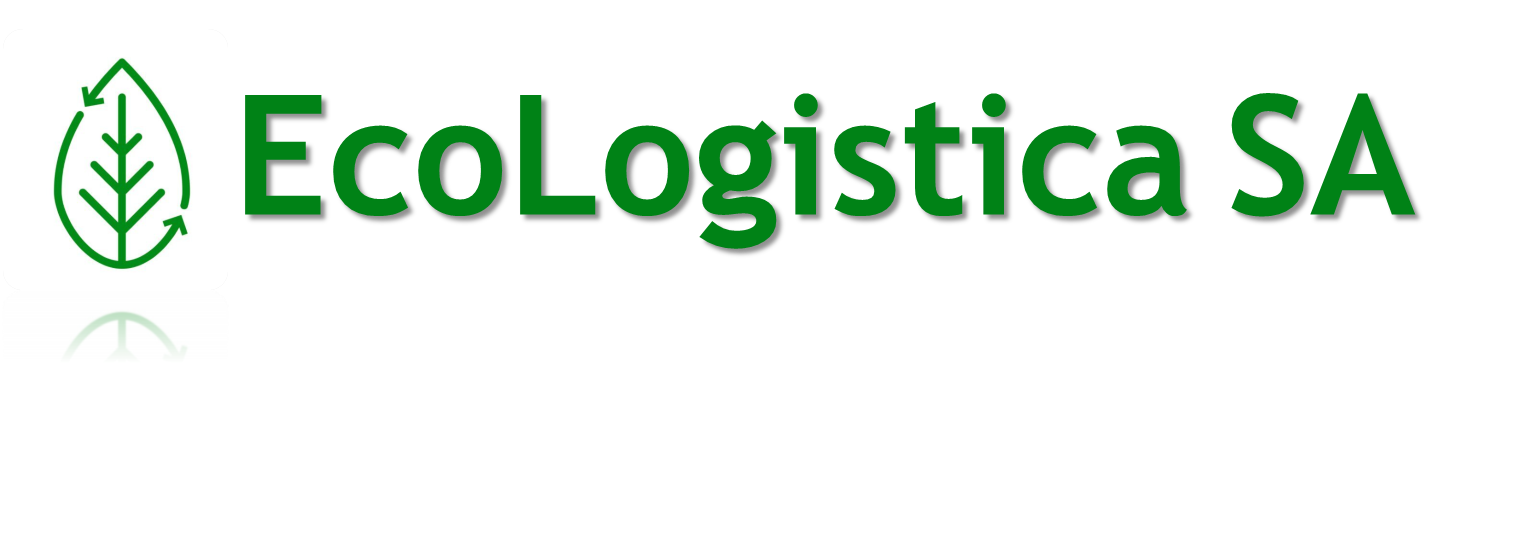

#  <span style="color:rgb(50,100,100);"><strong>&#128304; Desaf√≠o entregable #11: Segunda Entrega Proyecto Final &#128304;</strong></span>

## **<u>INDICE</u>**

##### **1.  Introduccion**

##### **2.  Contexto y Problema Comercial**
  *2.1  Objetivos y Preguntas de interes*
  
  *2.2  Audiencia*


##### **3.  Inspeccion de datos**


##### **4.  Data Acquisition**


##### **5.  Data Wrangling**
  
  *5.1 Combinacion de **df** con **df_tipo_de_cambio***

  *5.2 Creacion de variables para analisis temporal mas detallado*

  *5.3 Descripcion final de las variables*

  *5.4 Analisis de Duplicados y Nulos*


##### **6.  Exploratory Data Analysis - Visualizando Distribuciones** 
  *6.1 Tipo de operaciones y movimientos*

  *6.2 Clientes - Precio - Margen de ganancia*


##### **7. Correlaciones entre las variables**

  
##### **8.  Insights y recomendaciones**

## ‚è© **1. <u>Introduccion</u>** 

La empresa nace en el a√±o 1994 con el objetivo de desarrollar nuevas estrategias en el √°mbito de las entregas puerta a puerta a nivel Nacional.

A trav√©s de los a√±os la empresa se va consolidando en el rubro, logrando un nombre de prestigio en el mercado.

A lo largo de sus primeros 22 a√±os de vida, ECOLOGISTICA no solo logra crecer en volumen y especializaci√≥n, sino que tambi√©n incorpora nuevos servicios, todos ellos de alto valor agregado.

## ‚è© **2. <u>Contexto y Problema Comercial</u>**

La empresa ECOLOGISTICA se dedica a ofrecer servicios de env√≠o y log√≠stica a nivel nacional. En su operaci√≥n diaria, la empresa realiza diferentes tipos de operaciones para sus clientes, desde el transporte de paquetes y distribuci√≥n de productos. Adem√°s, la empresa se enfrenta a desaf√≠os relacionados con la facturaci√≥n y la rentabilidad, as√≠ como con la duraci√≥n de los env√≠os a diferentes zonas de destino.

Uno de los problemas que la empresa enfrenta es la falta de informaci√≥n detallada sobre el tipo de operaci√≥n m√°s frecuente que realiza, lo que dificulta la toma de decisiones informadas sobre su operaci√≥n diaria y su rentabilidad. Adem√°s, la empresa no cuenta con un an√°lisis exhaustivo de la facturaci√≥n y los costos, lo que dificulta la identificaci√≥n de los costos m√°s significativos y los clientes m√°s rentables.

Para abordar estos problemas, es necesario llevar a cabo un an√°lisis detallado de la operaci√≥n diaria de la empresa, recopilar y analizar los datos de facturaci√≥n y costos,seg√∫n la zona de destino. De esta manera, la empresa podr√° tomar decisiones informadas sobre su operaci√≥n diaria, identificar las √°reas de mejora en su rentabilidad y satisfacer mejor las necesidades de los clientes.

### üî¶ **2.1  <u>Objetivos y Preguntas de interes</u>**

**Objetivo**: Analizar el volumen y la distribuci√≥n de los env√≠os seg√∫n el cliente, la zona destino, la provincia y el tiempo.

**Preguntas**:
*¬øQu√© clientes tienen el mayor y el menor n√∫mero de env√≠os y bultos?
¬øQu√© zonas y provincias tienen el mayor y el menor n√∫mero de env√≠os y bultos?
¬øC√≥mo var√≠a el n√∫mero de env√≠os y bultos seg√∫n el a√±o, el mes, la semana y el d√≠a de la semana?*

**Objetivo**: Analizar la rentabilidad de los env√≠os seg√∫n el precio, el costo, el margen y la zona destino.

**Preguntas**:
*¬øQu√© zonas tienen el mayor y el menor precio, costo, margen y rentabilidad por env√≠o?
¬øC√≥mo se relaciona el precio, el costo, el margen y la rentabilidad con el peso, los bultos o el tipo de servicio?
¬øQu√© factores influyen en la rentabilidad de los env√≠os?
¬øQu√© estrategias se pueden implementar para mejorar la rentabilidad de los env√≠os?*

**Objetivo**: Predecir el precio de los env√≠os seg√∫n las variables geogr√°ficas, temporales y operativas.

**Preguntas**:
*¬øQu√© variables se pueden usar para estimar el precio de los env√≠os?
¬øQu√© modelo predictivo se puede aplicar para predecir el precio de los env√≠os?
¬øQu√© nivel de precisi√≥n tiene el modelo predictivo?
¬øQu√© ventajas tiene predecir el precio de los env√≠os para la gesti√≥n del negocio?*

### üî¶ **2.2 <u>Audiencia</u>**

**La alta direcci√≥n de la empresa:** *informar los resultados del an√°lisis y las recomendaciones para mejorar la rentabilidad y la satisfacci√≥n del cliente.*

**Los departamentos de operaciones y log√≠stica:** *mejorar la eficiencia y la efectividad de los procesos de operaciones y log√≠stica.*

**Los analistas de datos y finanzas:** *proporcionar una descripci√≥n detallada del an√°lisis de datos y los resultados financieros.*

**Los inversores y accionistas:** *informar sobre la rentabilidad y el desempe√±o financiero de la empresa.*

## ‚è© **3. <u>Inspeccion de datos</u>**

In [1]:

#Cargamos las librer√≠as
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
import missingno as msno;
import warnings;
import matplotlib.ticker as mtick;
warnings.filterwarnings("ignore");

# Configurar pandas para que muestre toda la tabla sin truncar los datos
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None);
pd.set_option('display.max_rows', None);
pd.set_option('display.width', None);
import locale;

# Establecemos el locale a espa√±ol
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8');

## ‚è© **4. <u>Data Acquisition</u>**

Procederemos a cargar los data Set:

   ‚ô¶  **1 - df** "contiene el set de datos a trabajar" (fuente: empresa de logistica)*

   ‚ô¶  **2 - df_tipo_de_cambio** "contiene el historico del valor del dolar en argentina dia a dia" (fuente: 'https://datos.gob.ar/dataset/sspm-tipos-cambio-historicos/archivo/sspm_175.1')

   ****BIS*** *vale destacar que los datos originales tienen muchos datos sucios lo cual va a requerir una normalizacion de los mismos ordenadamente*


In [2]:
df = pd.read_csv('F:\\Proyecto\\Proyecto_Coder_DS\\set de datos\\df_proyecto_coder.csv', delimiter=',')
df_tipo_de_cambio = pd.read_csv('F:\\Proyecto\\Proyecto_Coder_DS\\set de datos\\tipo_cambio.csv', delimiter=',')

In [3]:
datasets = {'df': df, 'df_tipo_de_cambio': df_tipo_de_cambio}

for nombre, data in datasets.items():
    print(f'{nombre.upper()}:\n')
    print(f'\t El dataset tiene {data.shape[0]} filas y {data.shape[1]} columnas. \n')
    display(data.head())
    display(data.dtypes)
    print("Tipos de datos de cada columna: \n")
    print(data.dtypes.value_counts())

DF:

	 El dataset tiene 2168797 filas y 39 columnas. 



id  cliente_id                   servicio  bultos  peso  \
0   398567         454  SAC (con retiro producto)       1   3.0   
1   622855         454  SAC (con retiro producto)       1   3.0   
2  1279434         454  SAC (con retiro producto)       1   3.0   
3  1391674         454  SAC (con retiro producto)       1   3.0   
4  1992496         454  SAC (con retiro producto)       1   3.0   

       tipo_operacion  comprador_cp comprador_localidad comprador_provincia  \
0  ENTREGA PAQUETERIA          1611        DON TORCUATO        BUENOS AIRES   
1  ENTREGA PAQUETERIA          1611        DON TORCUATO        BUENOS AIRES   
2  ENTREGA PAQUETERIA          1611        DON TORCUATO        BUENOS AIRES   
3  ENTREGA PAQUETERIA          1611        DON TORCUATO        BUENOS AIRES   
4  ENTREGA PAQUETERIA          1611        DON TORCUATO        BUENOS AIRES   

   rem_cp    rem_localidad    rem_provincia       grupo  \
0    1000     DON TORCUATO  CAPITAL FEDERAL  DEVOLUCION   
1    1000  CAPITAL FEDERAL  CAPITAL FEDERAL   ENTREGADA   
2    1000  CAPITAL FEDERAL  CAPITAL FEDERAL   ENTREGADA   
3    1000  CAPITAL FEDERAL  CAPITAL FEDERAL   ENTREGADA   
4    1000  CAPITAL FEDERAL  CAPITAL FEDERAL   ENTREGADA   

                              estado           fecha_hora   precio  \
0  2DAV-2 VISITA SIN CONTACTO ALGUNO  2020-01-03 10:55:58   555.00   
1                      POD-ENTREGADA  2020-05-28 10:41:32   656.29   
2                      POD-ENTREGADA  2021-02-03 07:45:51   856.67   
3                      POD-ENTREGADA  2021-03-30 09:09:27   856.67   
4                      POD-ENTREGADA  2021-10-19 14:59:14  1166.81   

   costo_adicional1  costo_adicional2  costo_adicional3  \
0               NaN               NaN               NaN   
1               NaN               NaN               NaN   
2               NaN               NaN               NaN   
3               NaN               NaN               NaN   
4               NaN               NaN               NaN   

   costo_despacho_a_expreso  costo_distribuidor  costo_interno  \
0                       NaN                 0.0           70.0   
1                       NaN                 0.0           70.0   
2                       NaN                 0.0           70.0   
3                       NaN                 0.0           70.0   
4                       NaN                 0.0          130.0   

   costo_por_contrareembolso  costo_por_monitoreo_activo  \
0                        NaN                         NaN   
1                        NaN                         NaN   
2                        NaN                         NaN   
3                        NaN                         NaN   
4                        NaN                         NaN   

   costo_servicio_retorno  costo_transporte      cliente_nombre  cp_destino  \
0                     NaN               NaN   SmartGenetics SRL        1611   
1                     NaN               NaN   SmartGenetics SRL        1611   
2                     NaN               NaN   SmartGenetics SRL        1611   
3                     NaN               NaN   SmartGenetics SRL        1611   
4                     NaN               NaN   SmartGenetics SRL        1611   

  localidad_destino zona_destino subzona_destino provincia_destino  \
0      DON TORCUATO         AMBA             GBA      BUENOS AIRES   
1      DON TORCUATO         AMBA             GBA      BUENOS AIRES   
2      DON TORCUATO         AMBA             GBA      BUENOS AIRES   
3      DON TORCUATO         AMBA             GBA      BUENOS AIRES   
4      DON TORCUATO         AMBA             GBA      BUENOS AIRES   

   cordon_destino  cp_origen localidad_origen zona_origen subzona_origen  \
0               3       1000  CAPITAL FEDERAL        AMBA           CABA   
1               3       1000  CAPITAL FEDERAL        AMBA           CABA   
2               3       1000  CAPITAL FEDERAL        AMBA           CABA   
3               3       1000  CAPITAL FED

id                              int64
cliente_id                      int64
servicio                       object
bultos                          int64
peso                          float64
tipo_operacion                 object
comprador_cp                    int64
comprador_localidad            object
comprador_provincia            object
rem_cp                          int64
rem_localidad                  object
rem_provincia                  object
grupo                          object
estado                         object
fecha_hora                     object
precio                        float64
costo_adicional1              float64
costo_adicional2              float64
costo_adicional3              float64
costo_despacho_a_expreso      float64
costo_distribuidor            float64
costo_interno                 float64
costo_por_contrareembolso     float64
costo_por_monitoreo_activo    float64
costo_servicio_retorno        float64
costo_transporte              float64
cliente_nomb

Tipos de datos de cada columna: 

object     18
float64    12
int64       9
dtype: int64
DF_TIPO_DE_CAMBIO:

	 El dataset tiene 7697 filas y 18 columnas. 



indice_tiempo  tipo_cambio_bna_vendedor  tipo_cambio_a3500  tipo_cambio_mae  \
0    2002-03-05                       NaN             1.9917              NaN   
1    2002-03-06                       NaN             2.0508              NaN   
2    2002-03-07                       NaN             2.1375              NaN   
3    2002-03-08                       NaN             2.2033              NaN   
4    2002-03-09                       NaN             2.2033              NaN   

   volumen_mae  tipo_cambio_implicito_en_adrs  futuro_rofex_usd1m  \
0          NaN                       2.180124                 NaN   
1          NaN                       2.222222                 NaN   
2          NaN                       2.343949                 NaN   
3          NaN                       2.227778                 NaN   
4          NaN                       2.227778                 NaN   

   interes_abierto_1m  futuro_rofex_usd2m  interes_abierto_2m  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   futuro_rofex_usd3m  interes_abierto_3m  futuro_rofex_usd4m  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   interes_abierto_4m  futuro_rofex_usd5m  interes_abierto_5m  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

   futuro_rofex_usd6m  interes_abierto_6m  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN

indice_tiempo                     object
tipo_cambio_bna_vendedor         float64
tipo_cambio_a3500                float64
tipo_cambio_mae                  float64
volumen_mae                      float64
tipo_cambio_implicito_en_adrs    float64
futuro_rofex_usd1m               float64
interes_abierto_1m               float64
futuro_rofex_usd2m               float64
interes_abierto_2m               float64
futuro_rofex_usd3m               float64
interes_abierto_3m               float64
futuro_rofex_usd4m               float64
interes_abierto_4m               float64
futuro_rofex_usd5m               float64
interes_abierto_5m               float64
futuro_rofex_usd6m               float64
interes_abierto_6m               float64
dtype: object

Tipos de datos de cada columna: 

float64    17
object      1
dtype: int64


TENGNO QUE AGRAGAR LA EXPLICACION DE LAS VARIABLES

## ‚è© **5. <u>Data Wrangling </u>**

En esta secci√≥n realizaremos algunas transformaciones:

Combinaci√≥n de *df* con *df_tipo_de_cambio*. De esta forma, obtendremos el valor de cotizaci√≥n del D√ìLAR en la fecha correspondiente, lo que nos permitir√° obtener la representaci√≥n en moneda dura de las variables *"precio"* y *"total_costo"*. Para esto, crearemos las variables de *total costo, rentabilidad y margen de ganancias* tanto en **PESOS ARGENTINOS** como en **D√ìLARES**. Comprobaremos si exsiten outlier en las variables *precio* asi como todas las realcionadas a los *costos*, de detectarlos se determinara la necesidad de eliminarlos o modificarlos. Con el resultado obtenido, generaremos un nuevo conjunto de datos.

Para mejorar la calidad y la utilidad de los datos en nuestro proyecto, una vez realizadas estas transformaciones, es necesario convertir las variables "fecha_hora" al formato .date y crear nuevas variables que contengan el nombre del d√≠a y el mes correspondientes. De esta forma, podremos realizar un an√°lisis temporal m√°s detallado y obtener una visi√≥n m√°s completa de los patrones y tendencias en los datos.

Por ultimo procederemos a realizar una descripci√≥n detallada de las variables seleccionadas y analizar los valores nulos para determinar su impacto en el proyecto. Este an√°lisis nos permitir√° identificar posibles problemas o sesgos en los datos, as√≠ como tambi√©n nos dar√° una idea de qu√© variables son m√°s importantes para nuestro an√°lisis y c√≥mo podemos utilizarlas de manera efectiva.

‚ô¶ Creamos una variable la cual llamaremos **'movimiento'** para poder segmentar el tipo de guia, donde el tipo va a depender del Codigo Postal origen y el Codigo Postal destino.

codigo postal menor a 2000 = ***AMBA***

codigo postal mayor o igual a 2000 = ***INTERIOR***

De esto obtendremos 4 resultados:

In [4]:
def movimiento(row):
    if row['cp_origen'] < 2000 and row['cp_destino'] < 2000:
        return 'AMBA-AMBA'
    elif row['cp_origen'] < 2000 and row['cp_destino'] >= 2000:
        return 'AMBA-INTERIOR'
    elif row['cp_origen'] >= 2000 and row['cp_destino'] < 2000:
        return 'INTERIOR-AMBA'
    else:
        return 'INTERIOR-INTERIOR'

# Crear nueva columna "movimiento"
df['movimiento'] = df.apply(movimiento, axis=1)
print(df['movimiento'].unique())

['AMBA-AMBA' 'AMBA-INTERIOR' 'INTERIOR-AMBA' 'INTERIOR-INTERIOR']


‚ô¶ Definimos una lista con los nombres de las columnas que se procesaran

In [5]:
columnas_procesar = [
'precio',
'bultos',
'costo_adicional1',
'costo_adicional2',
'costo_adicional3',
'costo_despacho_a_expreso',
'costo_distribuidor',
'costo_interno',
'costo_por_contrareembolso',
'costo_por_monitoreo_activo',
'costo_servicio_retorno',
'costo_transporte',]

‚ô¶ Como las columnas de costos y precios tal vez tengan algun **NaN**, procedemos ponerele valor **'0'**

In [6]:
for col in columnas_procesar:
    df[col] = df[col].fillna(0)

#### üî¶ **5.1** Combinacion de **df** con **df_tipo_de_cambio**

Antes validaremos si el formato del tipo fecha son incompatibles, de ser asi se procedera a normalizar los datos.

In [7]:
#validacion del tipo de dato en la variable "fecha_hora"
print(df["fecha_hora"].dtypes)
print(df["fecha_hora"].head(2))
print(df_tipo_de_cambio["indice_tiempo"].dtypes)
print(df_tipo_de_cambio["indice_tiempo"].head(2))

object
0    2020-01-03 10:55:58
1    2020-05-28 10:41:32
Name: fecha_hora, dtype: object
object
0    2002-03-05
1    2002-03-06
Name: indice_tiempo, dtype: object


al detectar efectivamente la existencia de formatos diferentes en las variables fechas, procederemos a realizar las modificaciones.

In [8]:
df["fecha_hora"] = pd.to_datetime(df["fecha_hora"], format="%Y-%m-%d  %H:%M:%S")
df["fecha_hora2"] = df["fecha_hora"].dt.date
df["fecha_hora2"] = pd.to_datetime(df["fecha_hora2"], format="%Y-%m-%d")
df_tipo_de_cambio["indice_tiempo"] = pd.to_datetime(df_tipo_de_cambio["indice_tiempo"], format="%Y-%m-%d")

Unimos los DataFrames **'df'** y **'tipo_de_cambio'** seg√∫n la columna ***'fecha2'*** y ***'indice_tiempo'***

In [9]:
df_1 = pd.merge(df, df_tipo_de_cambio, left_on='fecha_hora2', right_on='indice_tiempo')

Se crean las columnas **'total_costo_USD'** y **'precio_USD'** dividiendo **'total_costo'** y **'precio'** respectivamente por el tipo de cambio.

Se calcula la ganancia restando **'total_costo'** de **'precio'** y se guarda en **'margen_ganancia'**.

Se calcula la rentabilidad dividiendo **'margen_ganancia'** entre **'precio'** y se guarda en **'rentabilidad'**.

Se calcula la ganancia en d√≥lares restando **'total_costo_USD'** de **'precio_USD'** y se guarda en **'margen_ganancia_USD'**.

Se calcula la rentabilidad en d√≥lares dividiendo **'margen_ganancia_USD'** entre **'precio_USD'** y se guarda en **'rentabilidad_USD'**.

En resumen, se realizan c√°lculos y se crean nuevas columnas relacionadas con costos, ganancias y rentabilidades tanto en la moneda local como en d√≥lares para cada registro 

In [10]:
columnas_procesar.remove('precio')
columnas_procesar.remove('bultos')
df_1['total_costo'] = df_1[columnas_procesar].sum(axis=1)
df_1['total_costo_USD']=df_1['total_costo']/df_1['tipo_cambio_bna_vendedor']
df_1['precio_USD']=df_1['precio']/df_1['tipo_cambio_bna_vendedor']
df_1['precio'] = df_1['precio'].fillna(0)
df_1['margen_ganancia'] = df_1['precio'] - df_1['total_costo']
rentabilidad = df_1['margen_ganancia'] / df_1['precio']
rentabilidad[rentabilidad.isna() & (df_1['precio'] == 0) & (df_1['total_costo'] == 0) & (df_1['margen_ganancia'] == 0)] = 0
df_1['rentabilidad'] = rentabilidad
df_1['margen_ganancia_USD'] = df_1['precio_USD'] - df_1['total_costo_USD']
rentabilidad_USD = df_1['margen_ganancia_USD'] / df_1['precio_USD']
df_1['rentabilidad_USD'] = rentabilidad_USD

Reducimos la dimencionalidad en un nuevo data set al seleccionar las columnas que utlizaremos para nuestro proyecto y analisis definitivo. 

In [11]:
columnas_seleccionadas=['id', 'cliente_id', 'cliente_nombre', 'servicio', 'tipo_operacion',
       'bultos', 'peso', 'grupo', 'estado', 
       'fecha_hora', 'fecha_hora2', 
       'tipo_cambio_bna_vendedor', 
       'precio', 'precio_USD', 'total_costo',
       'total_costo_USD',  'margen_ganancia','margen_ganancia_USD', 
       'rentabilidad', 'rentabilidad_USD', 
       'cp_destino', 'localidad_destino',  'provincia_destino', 'zona_destino', 'subzona_destino', 'cordon_destino', 
       'cp_origen', 'localidad_origen','provincia_origen', 'zona_origen', 'subzona_origen', 'cordon_origen','movimiento']

df_2=df_1[columnas_seleccionadas].copy()

Creamos algunas variables para realizar un an√°lisis temporal mejor detallado  

In [12]:
#creo columnas con el nombre y numero del dia, semana y mes de la variable "fecha_hora"
df_2["fecha_hora"] = pd.to_datetime(df_2["fecha_hora"], format="%Y-%m-%d  %H:%M:%S")
df_2['Month_1'] = pd.to_datetime(df_2['fecha_hora']).dt.strftime('%B')
df_2['mes_1'] = pd.to_datetime(df_2['fecha_hora']).dt.month
df_2['day_1'] = pd.to_datetime(df_2['fecha_hora']).dt.strftime('%A')
df_2['dia_1'] = pd.to_datetime(df_2['fecha_hora']).dt.day
df_2['semana_1'] = pd.to_datetime(df_2['fecha_hora']).dt.isocalendar().week
df_2['anio_1'] = pd.to_datetime(df_2['fecha_hora']).dt.year

#### üî¶ **5.3** Descrpcion final de las variables

**'id'** : "Clave que identifica la guia de operaci√≥n"

**'cliente_id'** : "Clave que identifica a la empresa cliente"

**'cliente_nombre'** : "Nombre de la empresa cliente"

**'servicio'** : "tipo de servicio contratado"

**'tipo_operacion'** : " Variable que identifica el tipo de operaci√≥n (Retiro, Entrega‚Ä¶)

**'grupo'** : "Cada estado del servicio corresponde a un grupo, esta variable muestra a que grupo corresponde cada estado"

**'estado'** : "estado en el que se encuentra la guia de operacion"

**'peso'** : "peso en kg de envio"

**'bultos'** : "muestra la cantidad bultos que conforman la guia de operaci√≥n"

**'fecha_hora'** : "fecha de creacion de la guia de operaci√≥n"

**'fecha_hora2'** : "fecha de creacion de la guia de operaci√≥n sin hh-mm-ss"

**'tipo_cambio_bna_vendedor'** : "cotizacion del dolar en la fecha"

**'precio'** : "precio de venta del servicio contratado en la guia de operaci√≥n"

**'precio_USD'** : "precio de venta equivalente en dolares segun Banco Nacion Argentino"

**'total_costo'** : "costo operativo de la guia de operaciones"

**'total_costo_USD'** : "costo operativo de la guia de operaciones en USD"

**'margen_ganancia'** : "diferencia entre el precio y el costo"

**'margen_ganancia_USD'** : "diferencia entre el precio en USD y el costo USD"

**'rentabilidad'** : "porcentaje del margen de ganancia sobre el precio"

**'rentabilidad_USD'** : "porcentaje del margen de ganancia en USD sobre el precio en USD"

**'cp_destino'** : "variable que contiene codigo postal destino"

**'localidad_destino'** : "variable que contiene la localidad destino"

**'provincia_destino'** : "variable que contiene la provincia destino"

**'destino_region'** : "variable que contiene a que region corresponde el destino ('CABA' 'GBA' 'CENTRO' 'NOA' 'NEA' 'CUYO' 'PATAGONIA')"

**'subzona_destino'** : "identifica la zona de destino de la guia de operacion (AMBA, INTERIOR)"

**'cp_origen'** : "variable que contiene codigo postal origen

**'localidad_origen'** : "variable que contiene la localidad origen"

**'provincia_origen'** : "variable que contiene la provincia origen"

**'zona_origen'** : "variable que contiene a que region corresponde el origen ('CABA' 'GBA' 'CENTRO' 'NOA' 'NEA' 'CUYO' 'PATAGONIA')"

**'subzona_origen'** : ""identifica la zona de destino de la guia de operacion (AMBA, INTERIOR)" 

**'cordon_origen', 'cordon_destino'**

**'movimiento'** : "clasifica las guias de operaci√≥n tomando en cuenta el origen y destino, (AMBA-INTERIOR, INTERIOR-INTERIOR, INTERIOR-AMBA)"



#### üî¶ **6.4** Analisis de Duplicados, Nulos y Outliers

#####  ***<u>DUPLICADOS</u>***

In [13]:
# Validar si hay duplicados
duplicados = df_2[df_2.duplicated(subset='id')]

if duplicados.shape[0] > 0:
    print(f'Hay {duplicados.shape[0]} filas duplicadas en el DataFrame')
else:
    print('No hay filas duplicadas en el DataFrame')

# Eliminar duplicados
df_2.drop_duplicates(subset='id', inplace=True)

# Verificar el resultado
print(f'\nLuego de la eliminaci√≥n de duplicados, el dataset tiene {df_2.shape[0]} filas y {df_2.shape[1]} columnas.')


No hay filas duplicadas en el DataFrame

Luego de la eliminaci√≥n de duplicados, el dataset tiene 2168797 filas y 39 columnas.


#####  ***<u>NULOS:</u>***

Chequeando cantidad de nulos 

Analizamos el % que representan estos nulos en el total de datos

Graficamos el % de nulos

In [14]:
serie_nulos = df_2.isnull().sum()
serie_nulos_sorted = serie_nulos.sort_values(ascending=False)
print(serie_nulos_sorted.head(6))

rentabilidad_USD    46676
peso                29854
grupo                   5
estado                  5
servicio                1
subzona_origen          0
dtype: int64


In [15]:
porcentaje_perdidos = df_2.isnull().sum() * 100 / len(df_2)
valores_perdidos = pd.DataFrame({'Porcentaje_Missing': porcentaje_perdidos})
valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False, inplace=True)
print(valores_perdidos.head(6))

                  Porcentaje_Missing
rentabilidad_USD            2.152161
peso                        1.376523
grupo                       0.000231
estado                      0.000231
servicio                    0.000046
subzona_origen              0.000000


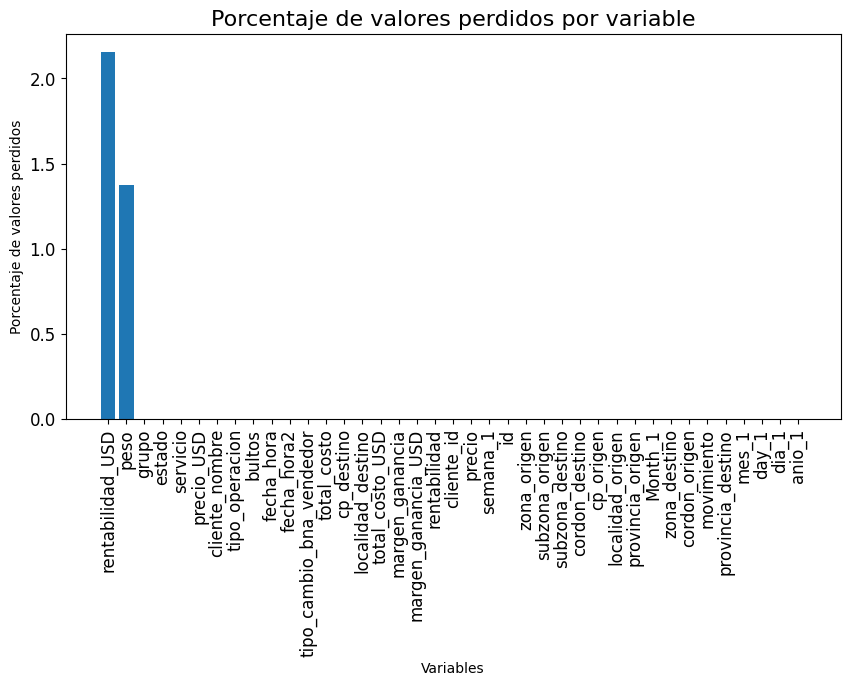

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
valores_perdidos_sorted = valores_perdidos.sort_values(by=['Porcentaje_Missing'],ascending=False)
ax.bar(valores_perdidos_sorted.index, valores_perdidos_sorted['Porcentaje_Missing'])
ax.set_xlabel('Variables')
ax.set_ylabel('Porcentaje de valores perdidos')
ax.set_title('Porcentaje de valores perdidos por variable', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

‚≠ï Despu√©s de analizar el porcentaje de valores faltantes en cada variable del DataFrame, podemos concluir que 

#####  ***<u>OUTLIERS:</u>***

Validaremos si hay otliers en las variables **'precio', 'total_costo','precio_USD', 'total_costo_USD'** y dependiendo del % los segmentaremos.

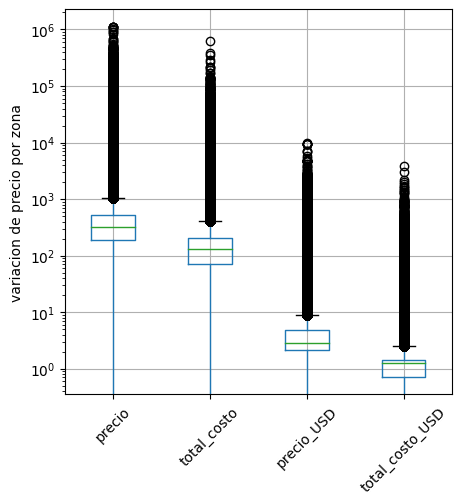

In [17]:
# Seleccionar las columnas 'precio' y 'total_costo' para el gr√°fico de caja
columns = ['precio', 'total_costo','precio_USD', 'total_costo_USD']

fig, axs = plt.subplots(figsize=(5, 5))
ax = df_2.boxplot(column=columns)
ax.set_yscale('log') # Establecer escala logar√≠tmica en el eje y
ax.set_ylabel('variacion de precio por zona') # Etiquetas de los ejes y t√≠tulo
plt.xticks(rotation=45)
plt.show()

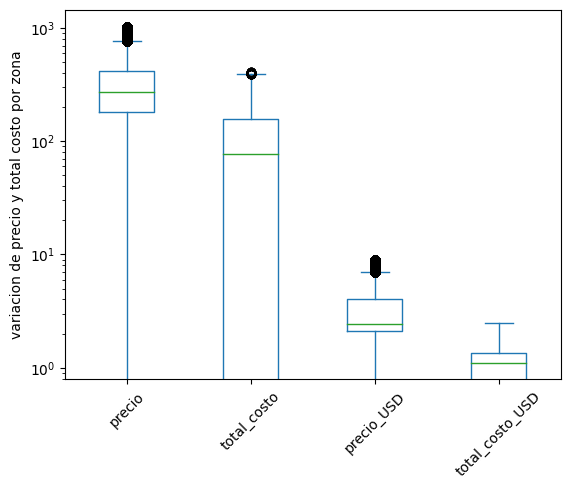

Cantidad de outliers: 375407
Proporci√≥n de outliers: 0.1730945773163648


In [18]:
# Calcular el rango intercuart√≠lico (IQR)
Q1 = df_2[columns].quantile(0.25)
Q3 = df_2[columns].quantile(0.75)
IQR = Q3 - Q1

# Filtrar los outliers
filtrado = df_2[~((df_2[columns] < (Q1 - 1.5 * IQR)) | (df_2[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Generar el gr√°fico de caja con los datos filtrados
filtrado.plot(kind='box', y=columns, ylabel='variacion de precio y total costo por zona')
plt.yscale('log')
plt.ylim(bottom=df_2[columns].min().min())
plt.xticks(rotation=45)
plt.show()

# Identificar la cantidad de outliers y proporci√≥n de outliers
num_outliers = len(df_2) - len(filtrado)
prop_outliers = num_outliers / len(df_2)

print("Cantidad de outliers:", num_outliers)
print("Proporci√≥n de outliers:", prop_outliers)

Debido a la cantidad de Outliers, es fundamental separarlos y poder analizarlos por fuera asi como por dentro. 

**df_2** set con todo los datos
 
**df_2_sin_outliers** set sin outliers

**df_2_solo_outliers** set con outliers

### ‚è© **6. <u>Exploratory Data Analysis - Visualizando Distribuciones</u>** 

In [20]:
fecha_min = df_2['fecha_hora'].min()
fecha_max = df_2['fecha_hora'].max()
print(f'El DataFrame df_2 va desde el {fecha_min} hasta el {fecha_max}.')

El DataFrame df_2 va desde el 2020-01-01 08:54:38 hasta el 2022-12-31 21:16:17.


In [21]:
# Crear una nueva columna llamada "fecha" en el DataFrame "df_2" concatenando las columnas "anio_1" y "Month_1"
df_2['fecha'] = pd.to_datetime(df_2['anio_1'].astype(str) + '-' + df_2['mes_1'].astype(str) + '-1')

# Analizar las variaciones de env√≠os y bultos a lo largo del a√±o 
enviobulto = df_2.groupby(['zona_destino', 'fecha']).agg({'id':'count', 'bultos':'sum'}).reset_index()

# Obtener las zonas de destino √∫nicas
zd = enviobulto['zona_destino'].unique()

In [22]:
df_2a=df_2[['anio_1', 'mes_1', 'cliente_id','margen_ganancia_USD','id']]

promedios = df_2a.groupby(['cliente_id','anio_1', 'mes_1']).agg({'margen_ganancia_USD': 'sum', 'id': 'count'}).reset_index().round(2)
promedios.rename(columns={'id': 'cantidad_envios'}, inplace=True)

promedios2 = promedios.groupby(['anio_1', 'mes_1']).agg({'margen_ganancia_USD': 'mean', 'cantidad_envios': 'mean'}).reset_index().round(2)

def asignar_clasificacion(margen, envios, promedios):
    margen_promedio = promedios.loc[(promedios['anio_1'] == promedios['anio_1'].max()) & (promedios['mes_1'] == promedios['mes_1'].max()), 'margen_ganancia_USD'].values[0]
    envios_promedio = promedios.loc[(promedios['anio_1'] == promedios['anio_1'].max()) & (promedios['mes_1'] == promedios['mes_1'].max()), 'cantidad_envios'].values[0]
    margen_threshold = 1.3  # Porcentaje sobre el promedio (130%)
    envios_threshold = 1.3  # Porcentaje por debajo del promedio (130%)

    if margen >= margen_promedio * margen_threshold:
        if envios >= envios_promedio * envios_threshold:
            return 'Excelente'
        else:
            return 'Muy bueno'
    else:
        if envios >= envios_promedio * envios_threshold:
            return 'Bueno'
        else:
            if margen < margen_promedio * (1 - margen_threshold) and envios < envios_promedio * (1 - envios_threshold):
                return 'Malo'
            else:
                return 'Pesimo'

promedios['clasificacion del cliente'] = promedios.apply(lambda row: asignar_clasificacion(row['margen_ganancia_USD'], row['cantidad_envios'], promedios2), axis=1)
df_2 = df_2.merge(promedios[['cliente_id', 'anio_1', 'mes_1', 'clasificacion del cliente']], on=['cliente_id', 'anio_1', 'mes_1'], how='left')

In [23]:
# Filtrar los outliers
df_2_sin_outliers = df_2[~((df_2[columns] < (Q1 - 1.5 * IQR)) | (df_2[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Crear un DataFrame con los outliers
df_2_solo_outliers = df_2[((df_2[columns] < (Q1 - 1.5 * IQR)) | (df_2[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

#### üî¶ **6.2 Clientes - Precio - Margen de ganancia**

Al analizar el precio, costo y margen de ganancia en log√≠stica se puede lograr una mejor comprensi√≥n y control de los costos y rentabilidad en la cadena de suministro. Al conocer estos factores, es posible identificar oportunidades para reducir costos, mejorar la eficiencia operativa y aumentar la rentabilidad.

**Objetivo**: Analizar la rentabilidad de los env√≠os seg√∫n el precio, el costo, el margen y la zona destino.

**Preguntas**:
*¬øQu√© zonas tienen el mayor y el menor precio, costo, margen y rentabilidad por env√≠o?
¬øC√≥mo se relaciona el precio, el costo, el margen y la rentabilidad con el peso, los bultos o el tipo de servicio?
¬øQu√© factores influyen en la rentabilidad de los env√≠os?
¬øQu√© estrategias se pueden implementar para mejorar la rentabilidad de los env√≠os?*

In [62]:
# Definir una paleta de colores personalizada
custom_palette = {'Pesimo': '#FF6B6B', 'Muy bueno': '#FF9E9E', 'Bueno': '#FFD29D', 'Excelente': '#B8E986', 'Malo': '#81F781'}

# Configurar los colores de la paleta en Seaborn
sns.set_palette(custom_palette.values())

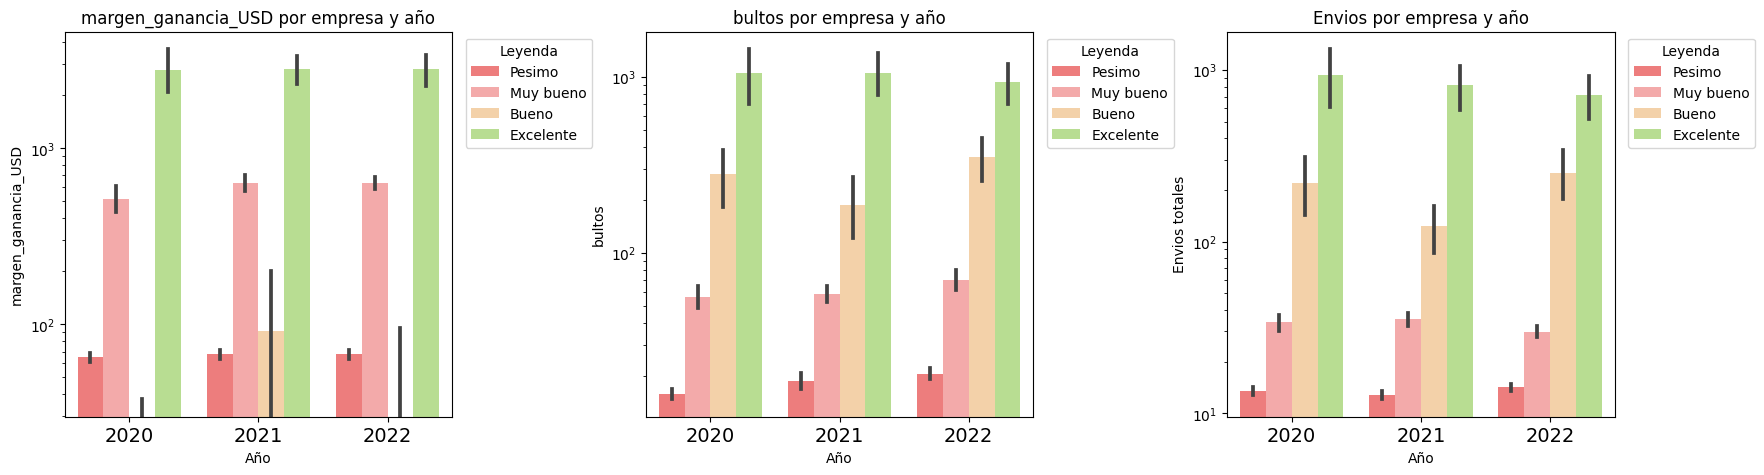

Clasificaciones √∫nicas: ['Pesimo' 'Muy bueno' 'Bueno' 'Excelente']
De un total de 402 empresas, 44 fueron clasificadas como Excelentes.
De un total de 402 empresas, 89 fueron clasificadas como Muy Buenas.
De un total de 402 empresas, 30 fueron clasificadas como Buena.
De un total de 402 empresas, 390 fueron clasificadas como Pesimas.
De un total de 402 empresas, 0 fueron clasificadas como Malas.
El porcentaje de la facturaci√≥n total que corresponde a las 44 empresas Excelentes es: 71.68328305110427 %


In [63]:
# calcular ventas totales por empresa y mes
group_empresa= df_2.groupby(['zona_destino','cliente_nombre', 'fecha','anio_1','mes_1','clasificacion del cliente']).agg({'margen_ganancia_USD':'sum', 'bultos':'sum', 'id':'count'}).reset_index()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5),gridspec_kw={'wspace': .5})
sns.barplot(data=group_empresa, x='anio_1', y='margen_ganancia_USD', hue='clasificacion del cliente',ax=axs[0])
axs[0].set_title('margen_ganancia_USD por empresa y a√±o')
axs[0].set_xlabel('A√±o')
axs[0].set_ylabel('margen_ganancia_USD')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[0].set_xticklabels(axs[0].get_xticklabels(), ha='center', fontsize=14)
axs[0].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


sns.barplot(data=group_empresa, x='anio_1', y='bultos', hue='clasificacion del cliente',ax=axs[1])
axs[1].set_title('bultos por empresa y a√±o')
axs[1].set_xlabel('A√±o')
axs[1].set_ylabel('bultos')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[1].set_xticklabels(axs[1].get_xticklabels(), ha='center', fontsize=14)
axs[1].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


sns.barplot(data=group_empresa, x='anio_1', y='id', hue='clasificacion del cliente',ax=axs[2])
axs[2].set_title('Envios por empresa y a√±o')
axs[2].set_xlabel('A√±o')
axs[2].set_ylabel('Envios totales')
axs[2].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[2].set_xticklabels(axs[2].get_xticklabels(), ha='center', fontsize=14)
axs[2].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


plt.show()
total_empresas = group_empresa['cliente_nombre'].nunique()
Excelente = group_empresa[group_empresa['clasificacion del cliente'] == 'Excelente']['cliente_nombre'].nunique()
Muy_bueno = group_empresa[group_empresa['clasificacion del cliente'] == 'Muy bueno']['cliente_nombre'].nunique()
buena = group_empresa[group_empresa['clasificacion del cliente'] == 'Bueno']['cliente_nombre'].nunique()
Pesimo = group_empresa[group_empresa['clasificacion del cliente'] == 'Pesimo']['cliente_nombre'].nunique()
Malo = group_empresa[group_empresa['clasificacion del cliente'] == 'Malo']['cliente_nombre'].nunique()

# Calcular el porcentaje de facturaci√≥n que corresponde a empresas buenas
empresas_buenas = group_empresa[group_empresa["clasificacion del cliente"] == "Excelente"]
facturacion_empresas_buenas = empresas_buenas["margen_ganancia_USD"].sum()
facturacion_total = group_empresa["margen_ganancia_USD"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

unique_clasificaciones = group_empresa['clasificacion del cliente'].unique()
print("Clasificaciones √∫nicas:", unique_clasificaciones)

print(f"De un total de {total_empresas} empresas, {Excelente} fueron clasificadas como Excelentes.")
print(f"De un total de {total_empresas} empresas, {Muy_bueno} fueron clasificadas como Muy Buenas.")
print(f"De un total de {total_empresas} empresas, {buena} fueron clasificadas como Buena.")
print(f"De un total de {total_empresas} empresas, {Pesimo} fueron clasificadas como Pesimas.")
print(f"De un total de {total_empresas} empresas, {Malo} fueron clasificadas como Malas.")
print(f"El porcentaje de la facturaci√≥n total que corresponde a las {Excelente} empresas Excelentes es:", porcentaje_empresas_buenas, "%")

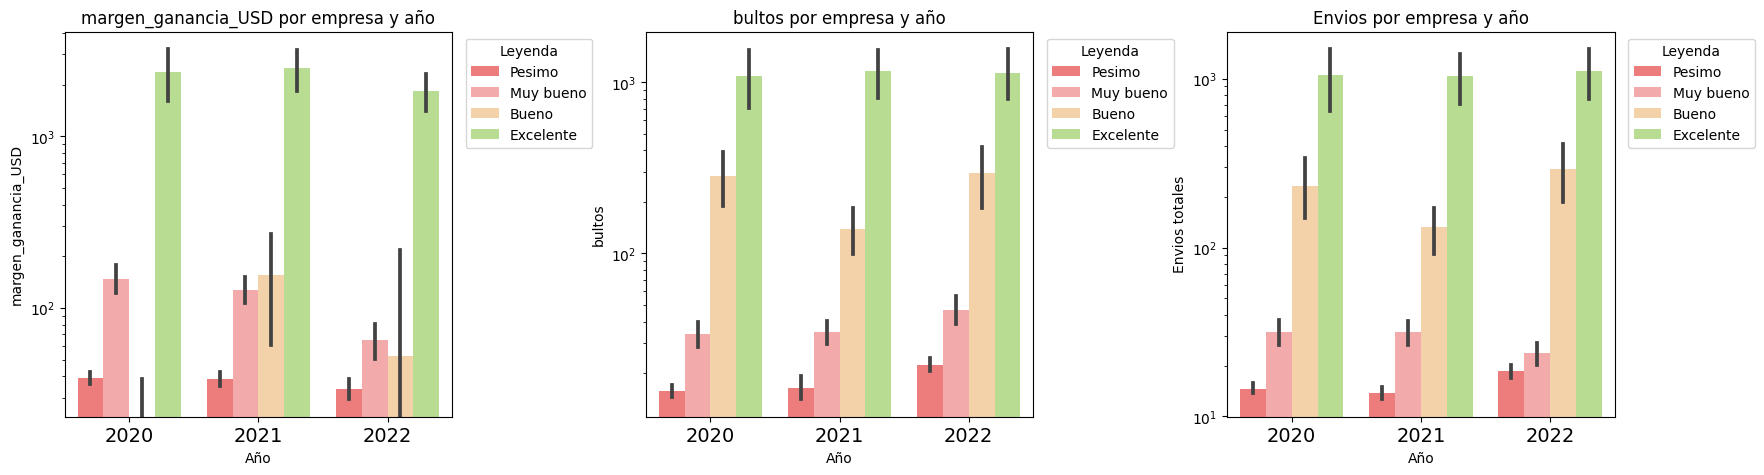

Clasificaciones √∫nicas: ['Pesimo' 'Muy bueno' 'Bueno' 'Excelente']
De un total de 328 empresas, 43 fueron clasificadas como Excelentes.
De un total de 328 empresas, 82 fueron clasificadas como Muy Buenas.
De un total de 328 empresas, 29 fueron clasificadas como Buena.
De un total de 328 empresas, 313 fueron clasificadas como Pesimas.
De un total de 328 empresas, 0 fueron clasificadas como Malas.
El porcentaje de la facturaci√≥n total que corresponde a las 43 empresas Excelentes es: 90.33554487385574 %


In [64]:
# calcular ventas totales por empresa y mes
group_empresa1= df_2_sin_outliers.groupby(['zona_destino','cliente_nombre', 'fecha','anio_1','mes_1','clasificacion del cliente']).agg({'margen_ganancia_USD':'sum', 'bultos':'sum', 'id':'count'}).reset_index()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5),gridspec_kw={'wspace': .5})
sns.barplot(data=group_empresa1, x='anio_1', y='margen_ganancia_USD', hue='clasificacion del cliente',ax=axs[0])
axs[0].set_title('margen_ganancia_USD por empresa y a√±o')
axs[0].set_xlabel('A√±o')
axs[0].set_ylabel('margen_ganancia_USD')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[0].set_xticklabels(axs[0].get_xticklabels(), ha='center', fontsize=14)
axs[0].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


sns.barplot(data=group_empresa1, x='anio_1', y='bultos', hue='clasificacion del cliente',ax=axs[1])
axs[1].set_title('bultos por empresa y a√±o')
axs[1].set_xlabel('A√±o')
axs[1].set_ylabel('bultos')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[1].set_xticklabels(axs[1].get_xticklabels(), ha='center', fontsize=14)
axs[1].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


sns.barplot(data=group_empresa1, x='anio_1', y='id', hue='clasificacion del cliente',ax=axs[2])
axs[2].set_title('Envios por empresa y a√±o')
axs[2].set_xlabel('A√±o')
axs[2].set_ylabel('Envios totales')
axs[2].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[2].set_xticklabels(axs[2].get_xticklabels(), ha='center', fontsize=14)
axs[2].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


plt.show()
total_empresas = group_empresa1['cliente_nombre'].nunique()
Excelente = group_empresa1[group_empresa1['clasificacion del cliente'] == 'Excelente']['cliente_nombre'].nunique()
Muy_bueno = group_empresa1[group_empresa1['clasificacion del cliente'] == 'Muy bueno']['cliente_nombre'].nunique()
buena = group_empresa1[group_empresa1['clasificacion del cliente'] == 'Bueno']['cliente_nombre'].nunique()
Pesimo = group_empresa1[group_empresa1['clasificacion del cliente'] == 'Pesimo']['cliente_nombre'].nunique()
Malo = group_empresa1[group_empresa1['clasificacion del cliente'] == 'Malo']['cliente_nombre'].nunique()

# Calcular el porcentaje de facturaci√≥n que corresponde a empresas buenas
empresas_buenas = group_empresa1[group_empresa1["clasificacion del cliente"] == "Excelente"]
facturacion_empresas_buenas = empresas_buenas["margen_ganancia_USD"].sum()
facturacion_total = group_empresa1["margen_ganancia_USD"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

unique_clasificaciones = group_empresa1['clasificacion del cliente'].unique()
print("Clasificaciones √∫nicas:", unique_clasificaciones)

print(f"De un total de {total_empresas} empresas, {Excelente} fueron clasificadas como Excelentes.")
print(f"De un total de {total_empresas} empresas, {Muy_bueno} fueron clasificadas como Muy Buenas.")
print(f"De un total de {total_empresas} empresas, {buena} fueron clasificadas como Buena.")
print(f"De un total de {total_empresas} empresas, {Pesimo} fueron clasificadas como Pesimas.")
print(f"De un total de {total_empresas} empresas, {Malo} fueron clasificadas como Malas.")
print(f"El porcentaje de la facturaci√≥n total que corresponde a las {Excelente} empresas Excelentes es:", porcentaje_empresas_buenas, "%")

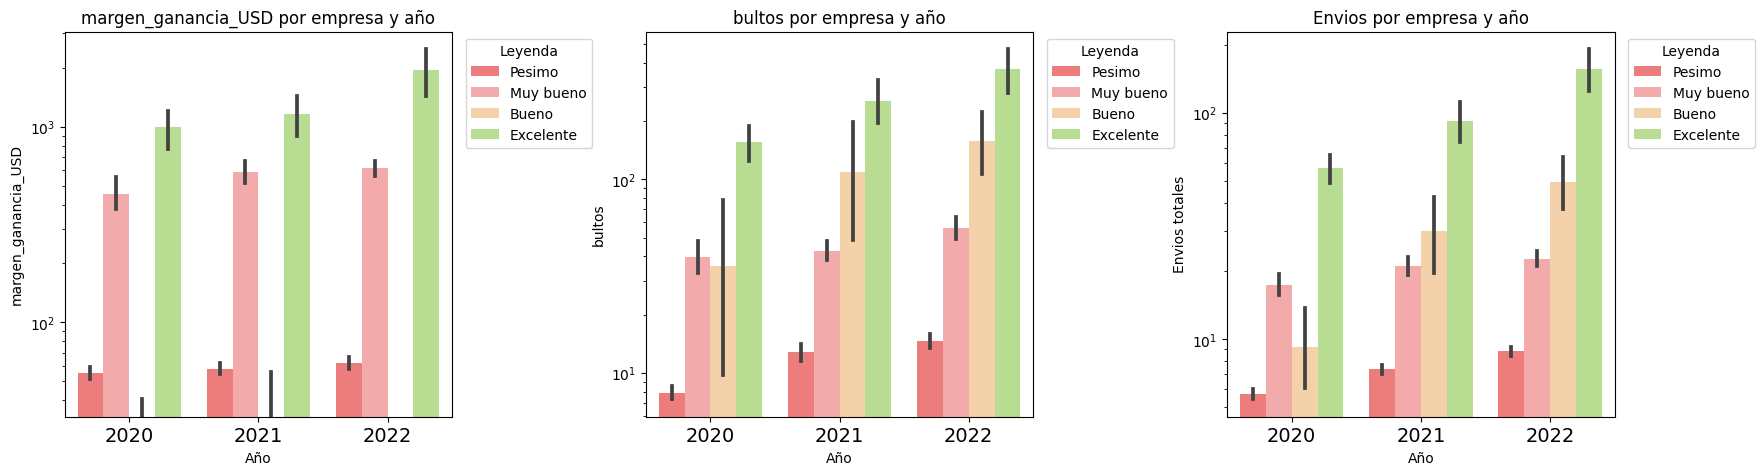

Clasificaciones √∫nicas: ['Pesimo' 'Muy bueno' 'Bueno' 'Excelente']
De un total de 377 empresas, 44 fueron clasificadas como Excelentes.
De un total de 377 empresas, 89 fueron clasificadas como Muy Buenas.
De un total de 377 empresas, 27 fueron clasificadas como Buena.
De un total de 377 empresas, 361 fueron clasificadas como Pesimas.
De un total de 377 empresas, 0 fueron clasificadas como Malas.
El porcentaje de la facturaci√≥n total que corresponde a las 44 empresas Excelentes es: 57.89478290579313 %


In [65]:
# calcular ventas totales por empresa y mes
group_empresa2= df_2_solo_outliers.groupby(['zona_destino','cliente_nombre', 'fecha','anio_1','mes_1','clasificacion del cliente']).agg({'margen_ganancia_USD':'sum', 'bultos':'sum', 'id':'count'}).reset_index()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5),gridspec_kw={'wspace': .5})
sns.barplot(data=group_empresa2, x='anio_1', y='margen_ganancia_USD', hue='clasificacion del cliente',ax=axs[0])
axs[0].set_title('margen_ganancia_USD por empresa y a√±o')
axs[0].set_xlabel('A√±o')
axs[0].set_ylabel('margen_ganancia_USD')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[0].set_xticklabels(axs[0].get_xticklabels(), ha='center', fontsize=14)
axs[0].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


sns.barplot(data=group_empresa2, x='anio_1', y='bultos', hue='clasificacion del cliente',ax=axs[1])
axs[1].set_title('bultos por empresa y a√±o')
axs[1].set_xlabel('A√±o')
axs[1].set_ylabel('bultos')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[1].set_xticklabels(axs[1].get_xticklabels(), ha='center', fontsize=14)
axs[1].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


sns.barplot(data=group_empresa2, x='anio_1', y='id', hue='clasificacion del cliente',ax=axs[2])
axs[2].set_title('Envios por empresa y a√±o')
axs[2].set_xlabel('A√±o')
axs[2].set_ylabel('Envios totales')
axs[2].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
axs[2].set_xticklabels(axs[2].get_xticklabels(), ha='center', fontsize=14)
axs[2].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y


plt.show()
total_empresas = group_empresa2['cliente_nombre'].nunique()
Excelente = group_empresa2[group_empresa2['clasificacion del cliente'] == 'Excelente']['cliente_nombre'].nunique()
Muy_bueno = group_empresa2[group_empresa2['clasificacion del cliente'] == 'Muy bueno']['cliente_nombre'].nunique()
buena = group_empresa2[group_empresa2['clasificacion del cliente'] == 'Bueno']['cliente_nombre'].nunique()
Pesimo = group_empresa2[group_empresa2['clasificacion del cliente'] == 'Pesimo']['cliente_nombre'].nunique()
Malo = group_empresa2[group_empresa2['clasificacion del cliente'] == 'Malo']['cliente_nombre'].nunique()

# Calcular el porcentaje de facturaci√≥n que corresponde a empresas buenas
empresas_buenas = group_empresa2[group_empresa2["clasificacion del cliente"] == "Excelente"]
facturacion_empresas_buenas = empresas_buenas["margen_ganancia_USD"].sum()
facturacion_total = group_empresa2["margen_ganancia_USD"].sum()
porcentaje_empresas_buenas = (facturacion_empresas_buenas / facturacion_total) * 100

unique_clasificaciones = group_empresa2['clasificacion del cliente'].unique()
print("Clasificaciones √∫nicas:", unique_clasificaciones)

print(f"De un total de {total_empresas} empresas, {Excelente} fueron clasificadas como Excelentes.")
print(f"De un total de {total_empresas} empresas, {Muy_bueno} fueron clasificadas como Muy Buenas.")
print(f"De un total de {total_empresas} empresas, {buena} fueron clasificadas como Buena.")
print(f"De un total de {total_empresas} empresas, {Pesimo} fueron clasificadas como Pesimas.")
print(f"De un total de {total_empresas} empresas, {Malo} fueron clasificadas como Malas.")
print(f"El porcentaje de la facturaci√≥n total que corresponde a las {Excelente} empresas Excelentes es:", porcentaje_empresas_buenas, "%")

In [66]:
# clasificar empresas en grupos seg√∫n percentiles
region_empresa=df_2
region_empresa1=df_2_sin_outliers
region_empresa2=df_2_solo_outliers

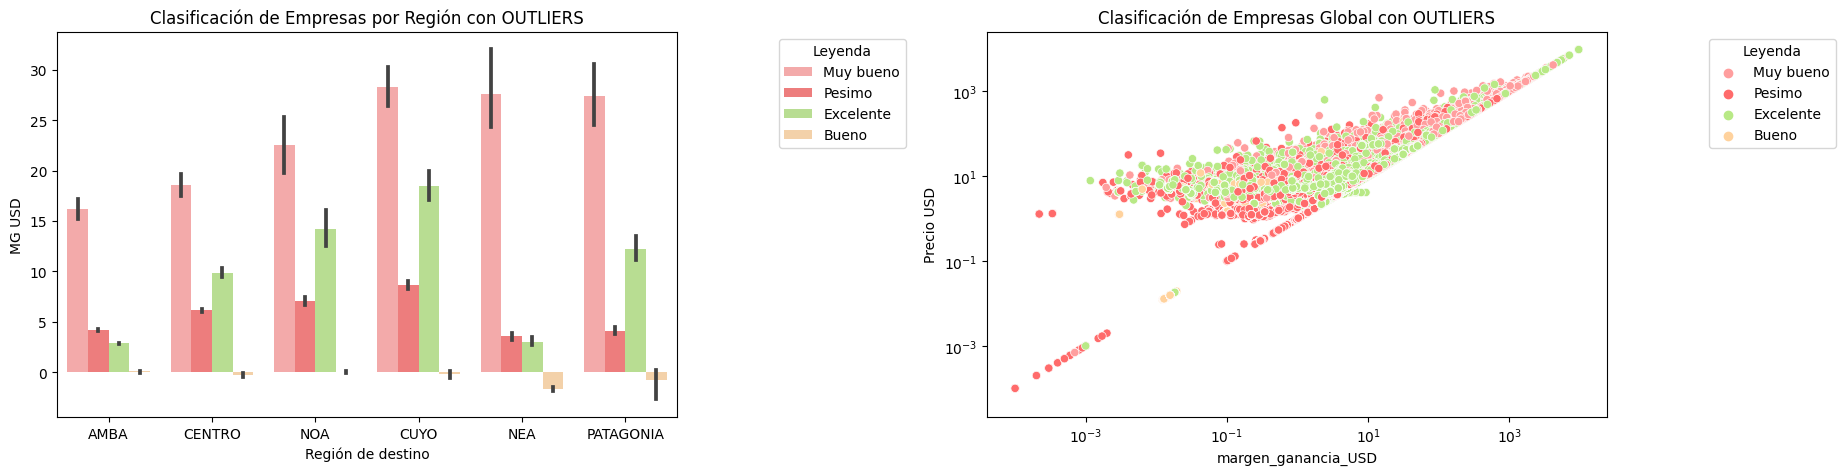

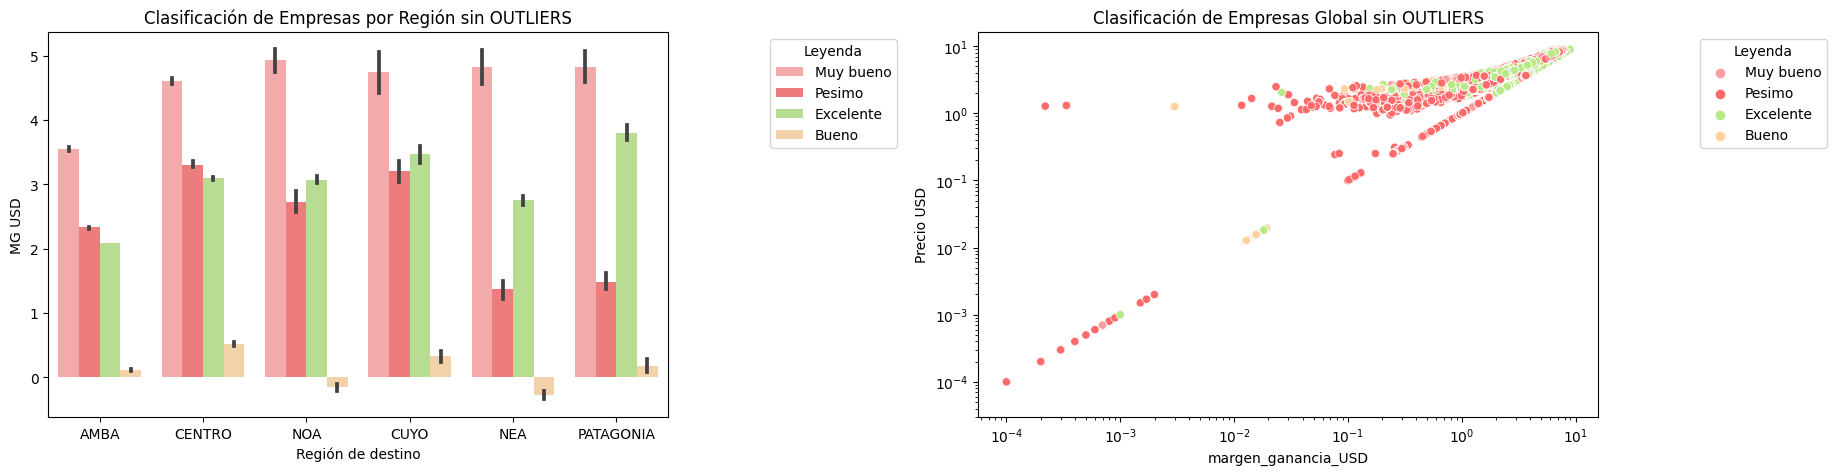

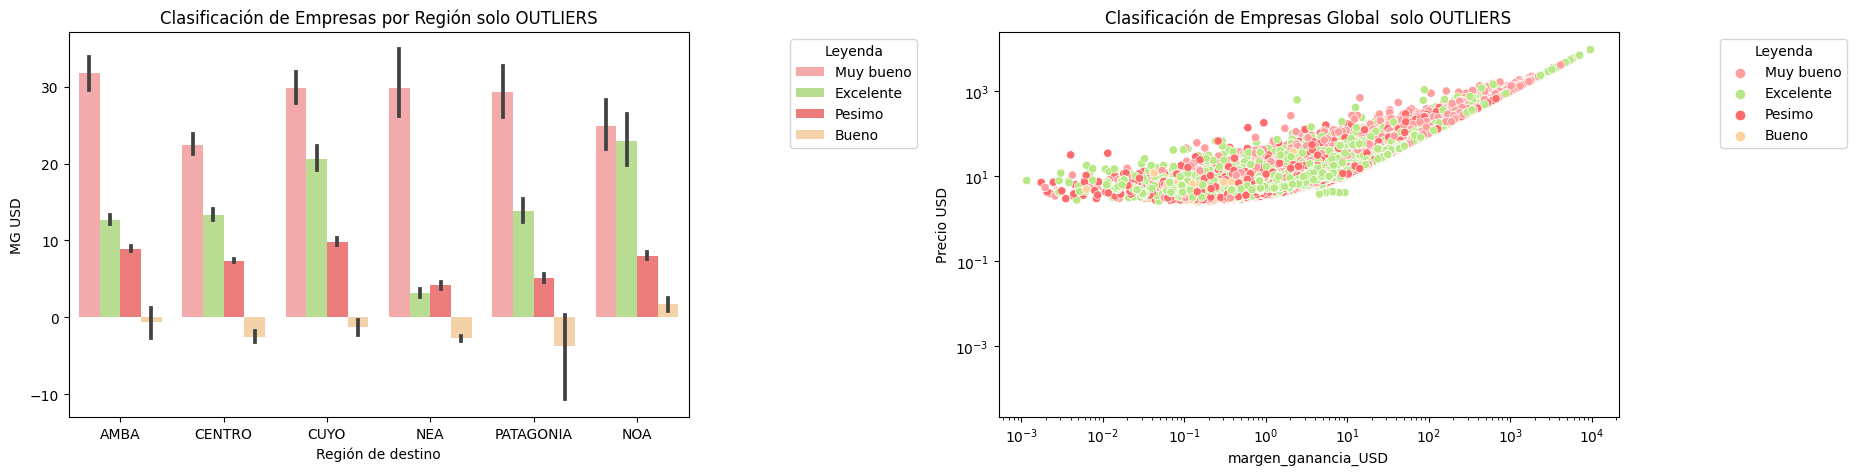

In [69]:


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), gridspec_kw={'wspace': 0.5})

sns.barplot(x='zona_destino', y='margen_ganancia_USD', hue='clasificacion del cliente', data=region_empresa, ax=axs[0], palette=custom_palette)
axs[0].set_xlabel('Regi√≥n de destino')
axs[0].set_ylabel('MG USD')
axs[0].set_title('Clasificaci√≥n de Empresas por Regi√≥n con OUTLIERS')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
#axs[0].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y

sns.scatterplot(x='margen_ganancia_USD', y='precio_USD', hue='clasificacion del cliente', data=region_empresa, ax=axs[1], palette=custom_palette)
axs[1].set_xlabel('margen_ganancia_USD')
axs[1].set_ylabel('Precio USD')
axs[1].set_title('Clasificaci√≥n de Empresas Global con OUTLIERS')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
#axs[1].set_ylim(bottom=0)  # Establecer l√≠mite inferior en 0
axs[1].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y
axs[1].set_xscale('log')  # Utilizar escala logar√≠tmica en el eje x
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), gridspec_kw={'wspace': 0.5})

sns.barplot(x='zona_destino', y='margen_ganancia_USD', hue='clasificacion del cliente', data=region_empresa1, ax=axs[0], palette=custom_palette)
axs[0].set_xlabel('Regi√≥n de destino')
axs[0].set_ylabel('MG USD')
axs[0].set_title('Clasificaci√≥n de Empresas por Regi√≥n sin OUTLIERS')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
#axs[0].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y

sns.scatterplot(x='margen_ganancia_USD', y='precio_USD', hue='clasificacion del cliente', data=region_empresa1, ax=axs[1], palette=custom_palette)
axs[1].set_xlabel('margen_ganancia_USD')
axs[1].set_ylabel('Precio USD')
axs[1].set_title('Clasificaci√≥n de Empresas Global sin OUTLIERS')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
#axs[1].set_ylim(bottom=0)  # Establecer l√≠mite inferior en 0
axs[1].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y
axs[1].set_xscale('log')  # Utilizar escala logar√≠tmica en el eje x
plt.show()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), gridspec_kw={'wspace': 0.5})

sns.barplot(x='zona_destino', y='margen_ganancia_USD', hue='clasificacion del cliente', data=region_empresa2, ax=axs[0], palette=custom_palette)
axs[0].set_xlabel('Regi√≥n de destino')
axs[0].set_ylabel('MG USD')
axs[0].set_title('Clasificaci√≥n de Empresas por Regi√≥n solo OUTLIERS')
axs[0].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
#axs[0].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y

sns.scatterplot(x='margen_ganancia_USD', y='precio_USD', hue='clasificacion del cliente', data=region_empresa2, ax=axs[1], palette=custom_palette)
axs[1].set_xlabel('margen_ganancia_USD')
axs[1].set_ylabel('Precio USD')
axs[1].set_title('Clasificaci√≥n de Empresas Global  solo OUTLIERS')
axs[1].legend(title="Leyenda", loc="upper right", bbox_to_anchor=(1.38, 1))
#axs[1].set_ylim(bottom=0)  # Establecer l√≠mite inferior en 0
axs[1].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y
axs[1].set_xscale('log')  # Utilizar escala logar√≠tmica en el eje x
plt.show()

‚≠ï Bas√°ndonos en los datos proporcionados, podemos concluir que de un total de 402 empresas, aproximadamente el 55% (220) se consideran buenas y el 55.47% (223) tienen un gran costo. Adem√°s, el 52% (209) de las empresas tienen una alta cantidad de env√≠os y todas ellas tienen un impacto positivo en cada regi√≥n.

Lo m√°s destacado es que el porcentaje de la facturaci√≥n total que corresponde a las 220 empresas buenas es del 95.38%, lo que sugiere que estas empresas son responsables de la mayor√≠a de los ingresos.

En estos 2 ultimos graficos podemos ver el volumen por region de la clasificacion de las empresas. Notamos que en la patagonia hay un buen porcentaje de empresas que no aportan y son malas comparadas con las otras. En el grafico de dispercion podemos ver a nivel global como estan pocicionadas las empresas, podemos destacar que hay un conjunto minoritario que destaca sobre todas.

En resumen, esto significa que hay un grupo significativo de empresas que tienen un papel importante en la generaci√≥n de ingresos y que las empresas buenas y con buen margen de ganancia son un factor clave en la rentabilidad del negocio. Sin embargo, se necesitar√≠a m√°s an√°lisis para entender mejor las razones detr√°s del √©xito de estas empresas y para identificar oportunidades de mejora para las que no se consideran buenas.

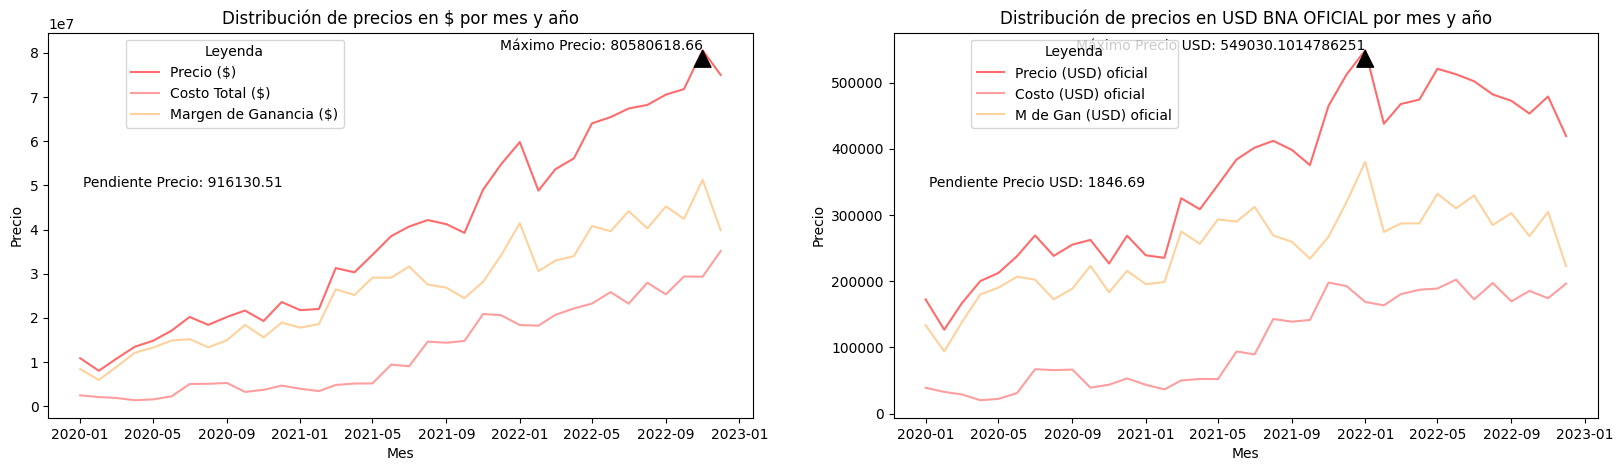

In [70]:
#creamos un df con las variables para analizar.
grouped_USD = df_2.groupby(["fecha"]).agg({'precio':'sum', 'precio_USD':'sum', 'total_costo_USD':'sum', 'total_costo':'sum', 'margen_ganancia_USD':'sum',  'margen_ganancia':'sum'}).reset_index()
grouped_USD1 = df_2_sin_outliers.groupby(["fecha"]).agg({'precio':'sum', 'precio_USD':'sum', 'total_costo_USD':'sum', 'total_costo':'sum', 'margen_ganancia_USD':'sum',  'margen_ganancia':'sum'}).reset_index()
grouped_USD2 = df_2_solo_outliers.groupby(["fecha"]).agg({'precio':'sum', 'precio_USD':'sum', 'total_costo_USD':'sum', 'total_costo':'sum', 'margen_ganancia_USD':'sum',  'margen_ganancia':'sum'}).reset_index()

# Crear dos subgr√°ficos separados
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Encontrar el punto m√°ximo para bultos y env√≠os y a√±adir la anotaci√≥n
max_precio = grouped_USD['precio'].max()
mean_precio = grouped_USD['precio'].mean()
min_precio = grouped_USD['precio'].min()
max_usd = grouped_USD['precio_USD'].max()
mean_usd = grouped_USD['precio_USD'].mean()
min_usd = grouped_USD['precio_USD'].min()
pendiente1 = ((max_precio - mean_precio) - min_precio) / len(grouped_USD['fecha'])
pendiente2 = ((max_usd - mean_usd) - min_usd) / len(grouped_USD['fecha'])

# Graficar el primer subgr√°fico
sns.lineplot(data=grouped_USD, x="fecha", y="precio", label="Precio ($)", ax=axs[0])
sns.lineplot(data=grouped_USD, x="fecha", y="total_costo", label="Costo Total ($)", ax=axs[0])
sns.lineplot(data=grouped_USD, x="fecha", y="margen_ganancia", label="Margen de Ganancia ($)", ax=axs[0])
axs[0].set_title("Distribuci√≥n de precios en $ por mes y a√±o")
axs[0].set_xlabel("Mes")
axs[0].set_ylabel("Precio")
axs[0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(0.1, 1))
axs[0].text(0.05, 0.6, f"Pendiente Precio: {pendiente1:.2f}", transform=axs[0].transAxes)

axs[0].annotate(f'M√°ximo Precio: {max_precio}',
                 xy=(grouped_USD[grouped_USD['precio'] == max_precio]['fecha'].iloc[0],
                     max_precio),
                 xytext=(grouped_USD[grouped_USD['precio'] == max_precio]['fecha'].iloc[0],
                         max_precio+10),
                 ha='right', fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))

axs[1].annotate(f'M√°ximo Precio USD: {max_usd}',
                 xy=(grouped_USD[grouped_USD['precio_USD'] == max_usd]['fecha'].iloc[0],
                     max_usd),
                 xytext=(grouped_USD[grouped_USD['precio_USD'] == max_usd]['fecha'].iloc[0],
                         max_usd+10),
                 ha='right', fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))

sns.lineplot(data=grouped_USD, x="fecha", y="precio_USD", label="Precio (USD) oficial", ax=axs[1])
sns.lineplot(data=grouped_USD, x="fecha", y="total_costo_USD", label="Costo (USD) oficial", ax=axs[1])
sns.lineplot(data=grouped_USD, x="fecha", y="margen_ganancia_USD", label="M de Gan (USD) oficial", ax=axs[1])
axs[1].set_title("Distribuci√≥n de precios en USD BNA OFICIAL por mes y a√±o")
axs[1].set_xlabel("Mes")
axs[1].set_ylabel("Precio")
axs[1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(0.1, 1))
axs[1].text(0.05, 0.6, f"Pendiente Precio USD: {pendiente2:.2f}", transform=axs[1].transAxes)

plt.show()

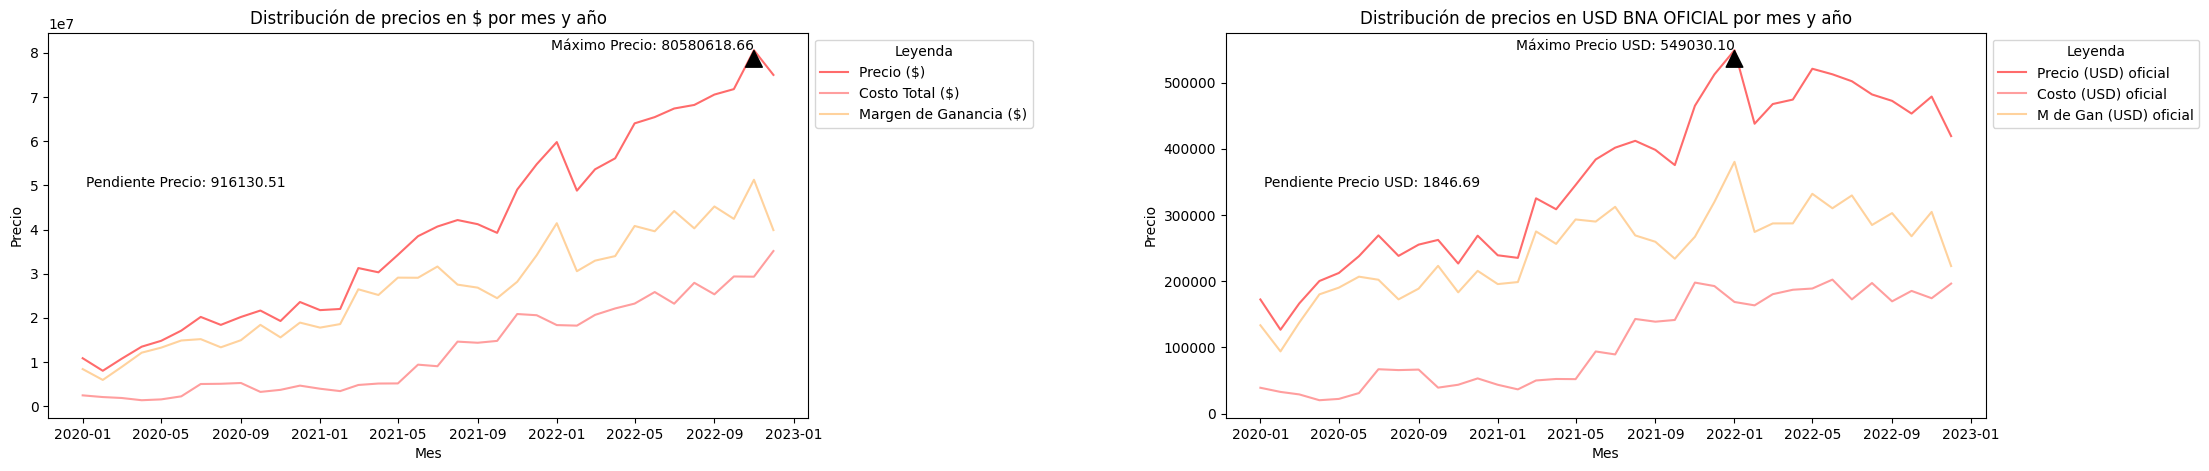

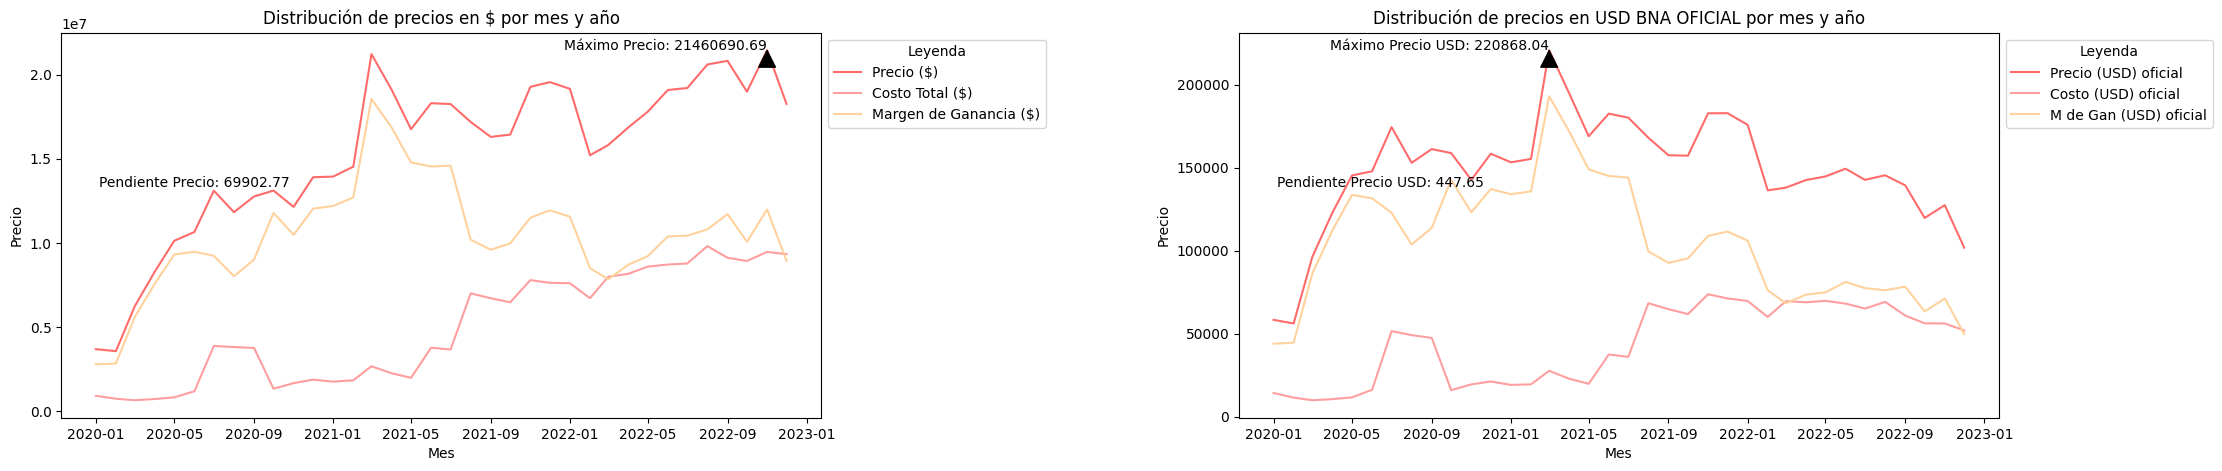

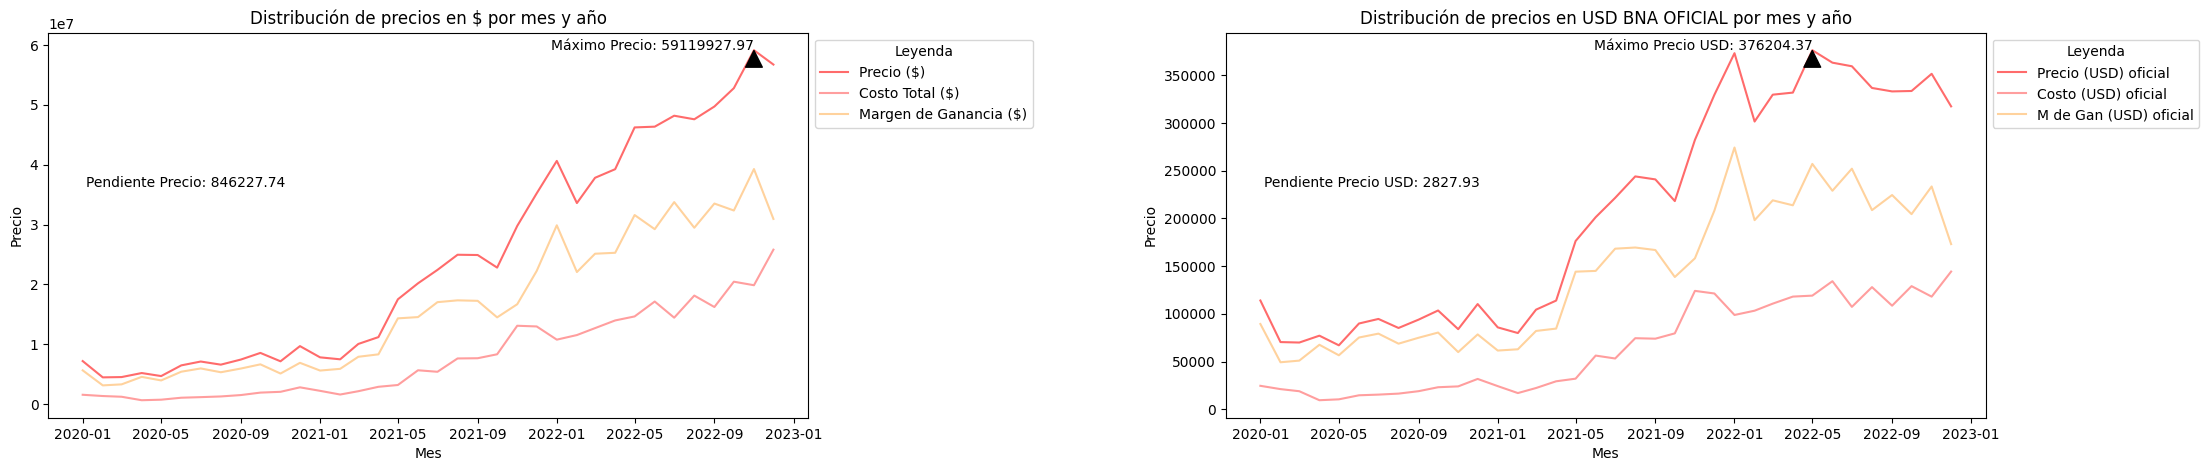

In [71]:
dataframes = [grouped_USD, grouped_USD1, grouped_USD2]

for df in dataframes:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(25, 5),gridspec_kw={'wspace': 0.55})

    max_precio = df['precio'].max()
    mean_precio = df['precio'].mean()
    min_precio = df['precio'].min()
    max_usd = df['precio_USD'].max()
    mean_usd = df['precio_USD'].mean()
    min_usd = df['precio_USD'].min()
    pendiente1 = ((max_precio - mean_precio) - min_precio) / len(df['fecha'])
    pendiente2 = ((max_usd - mean_usd) - min_usd) / len(df['fecha'])

    sns.lineplot(data=df, x="fecha", y="precio", label="Precio ($)", ax=axs[0])
    sns.lineplot(data=df, x="fecha", y="total_costo", label="Costo Total ($)", ax=axs[0])
    sns.lineplot(data=df, x="fecha", y="margen_ganancia", label="Margen de Ganancia ($)", ax=axs[0])
    axs[0].set_title("Distribuci√≥n de precios en $ por mes y a√±o")
    axs[0].set_xlabel("Mes")
    axs[0].set_ylabel("Precio")
    axs[0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))
    axs[0].text(0.05, 0.6, f"Pendiente Precio: {pendiente1:.2f}", transform=axs[0].transAxes)

    axs[0].annotate(f'M√°ximo Precio: {max_precio:.2f}',
                     xy=(df[df['precio'] == max_precio]['fecha'].iloc[0],
                         max_precio),
                     xytext=(df[df['precio'] == max_precio]['fecha'].iloc[0],
                             max_precio+10),
                     ha='right', fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))

    axs[1].annotate(f'M√°ximo Precio USD: {max_usd:.2f}',
                     xy=(df[df['precio_USD'] == max_usd]['fecha'].iloc[0],
                         max_usd),
                     xytext=(df[df['precio_USD'] == max_usd]['fecha'].iloc[0],
                             max_usd+10),
                     ha='right', fontsize=10, arrowprops=dict(facecolor='black', shrink=0.1))

    sns.lineplot(data=df, x="fecha", y="precio_USD", label="Precio (USD) oficial", ax=axs[1])
    sns.lineplot(data=df, x="fecha", y="total_costo_USD", label="Costo (USD) oficial", ax=axs[1])
    sns.lineplot(data=df, x="fecha", y="margen_ganancia_USD", label="M de Gan (USD) oficial", ax=axs[1])
    axs[1].set_title("Distribuci√≥n de precios en USD BNA OFICIAL por mes y a√±o")
    axs[1].set_xlabel("Mes")
    axs[1].set_ylabel("Precio")
    axs[1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))
    axs[1].text(0.05, 0.6, f"Pendiente Precio USD: {pendiente2:.2f}", transform=axs[1].transAxes)

    plt.show()


‚≠ïEn este conjunto de gr√°ficos podemos visualizar la distribuci√≥n de precios, costos y m√°rgenes de ganancia en d√≥lares (moneda dura) y en pesos argentinos (moneda volatil), as√≠ como tambi√©n la cantidad de env√≠os y bultos por mes y a√±o.

En cuanto a la distribuci√≥n de precios, se puede observar que el precio en pesos argentinos tiene un comportamiento positivo en alza por lo que podemos concluir que durante el per√≠odo del 01-01-2020 al 31-12-2022, el precio en pesos experiment√≥ una fuerte tendencia al alza devido a la inflacion con una pendiente de 3.802.768,89 alcanzando un m√°ximo de facturacion de $210.105.717,14. Por otro lado, el precio en d√≥lares tambi√©n experiment√≥ un aumento en el mismo per√≠odo, aunque con una pendiente mucho menor de 16.445,55 y un m√°ximo de us$1.266.409,43. Estos resultados indican que el negocio  ha sido m√°s rentable en pesos que en d√≥lares durante este per√≠odo de tiempo.

#### üî¶ **6.2 Tipo de operaciones y movimientos**

**Objetivo**: Analizar el volumen y la distribuci√≥n de los env√≠os seg√∫n el cliente, la zona destino, la provincia y el tiempo.

**Preguntas**:
*¬øQu√© clientes tienen el mayor y el menor n√∫mero de env√≠os y bultos?
¬øQu√© zonas y provincias tienen el mayor y el menor n√∫mero de env√≠os y bultos?
¬øC√≥mo var√≠a el n√∫mero de env√≠os y bultos seg√∫n el a√±o, el mes, la semana y el d√≠a de la semana?*

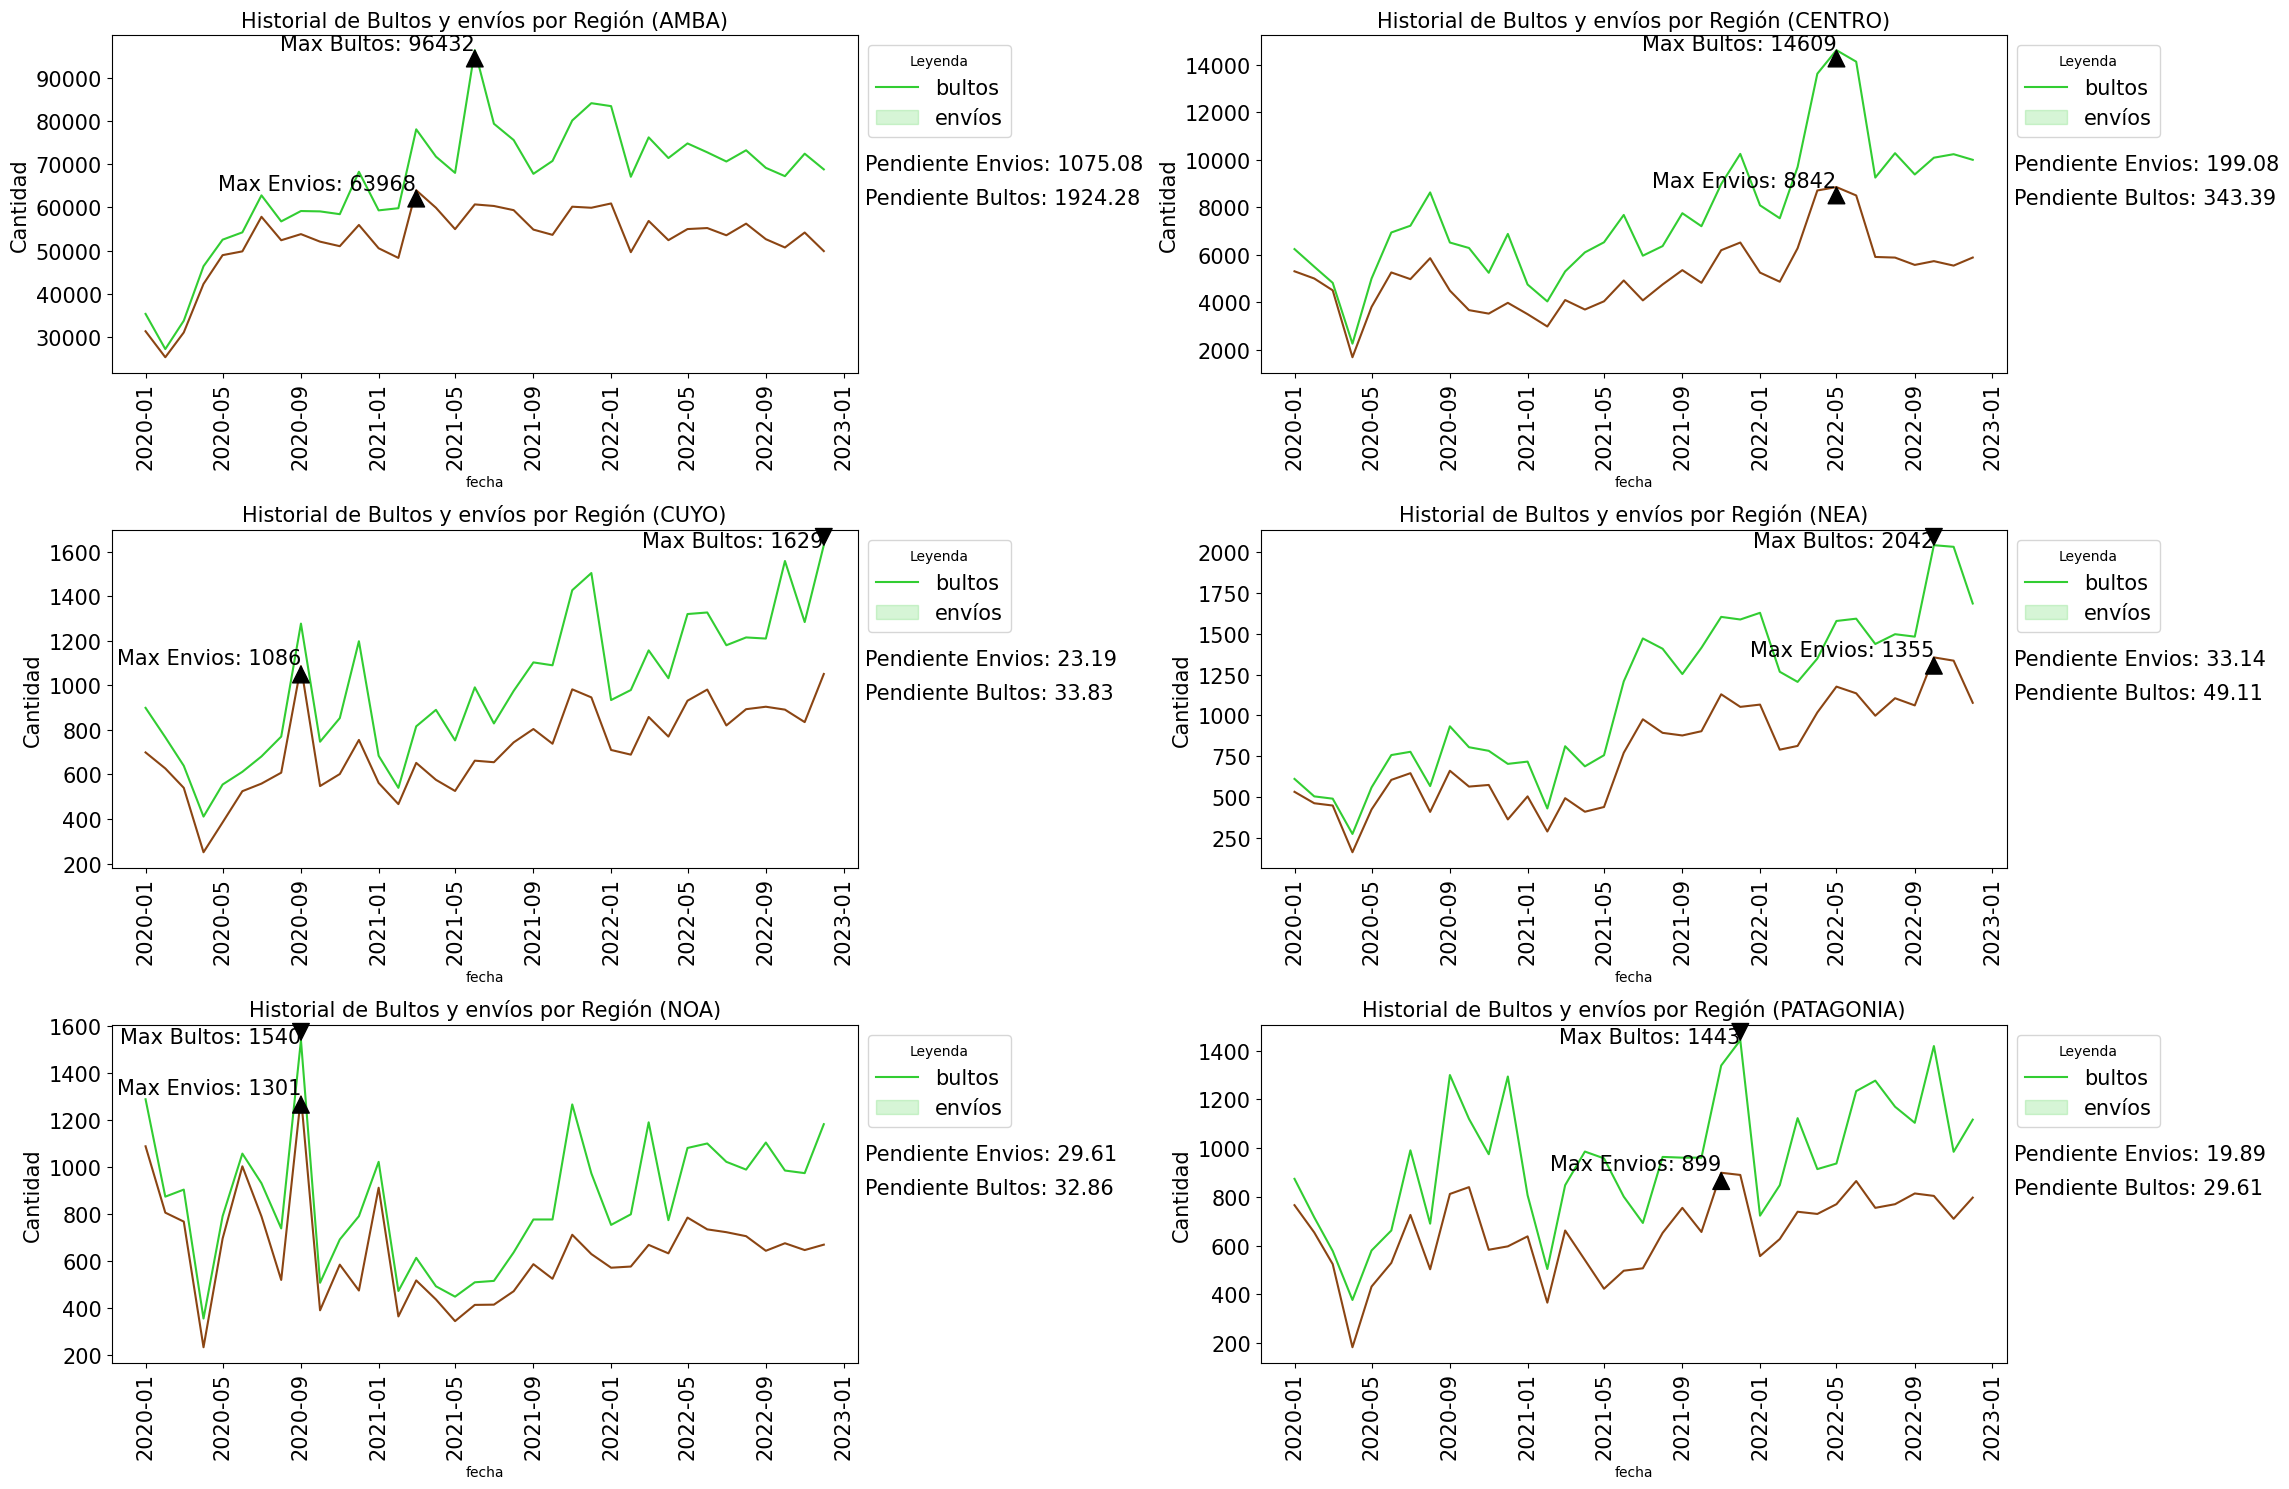

In [72]:
# Crear subgr√°ficos para cada zona_destino
plt.rcParams['figure.facecolor'] = 'white'

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(23, 15))



# Definir una lista de colores para el eje hue
colors_bultos = ['#32CD32', '#32CD32', '#32CD32', '#32CD32','#32CD32','#32CD32']
colors_envios = ['#8B4513', '#8B4513', '#8B4513', '#8B4513','#8B4513','#8B4513']



# Graficar los subgr√°ficos
for i, zona in enumerate(zd):
    row = i // 2
    col = i % 2
    sns.lineplot(data=enviobulto[enviobulto['zona_destino'] == zona], x="fecha", y="bultos", hue="zona_destino", palette=[colors_bultos[i]], ax=axs[row, col], label="bultos")
    sns.lineplot(data=enviobulto[enviobulto['zona_destino'] == zona], x="fecha", y="id", hue="zona_destino", palette=[colors_envios[i]], ax=axs[row, col], label="env√≠os")
    
    # Encontrar el punto m√°ximo para bultos y env√≠os y a√±adir la anotaci√≥n
    max_bultos = enviobulto[enviobulto['zona_destino'] == zona]['bultos'].max()
    min_bultos = enviobulto[enviobulto['zona_destino'] == zona]['bultos'].min()
    max_envios = enviobulto[enviobulto['zona_destino'] == zona]['id'].max()
    min_envios = enviobulto[enviobulto['zona_destino'] == zona]['id'].min()
    pendiente1 = (max_bultos - min_bultos) / len(enviobulto[enviobulto['zona_destino'] == zona])
    pendiente2 = (max_envios - min_envios) / len(enviobulto[enviobulto['zona_destino'] == zona])
    
    axs[row, col].annotate(f'Max Bultos: {max_bultos}', 
                           xy=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['bultos'].idxmax()], max_bultos), 
                           xytext=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['bultos'].idxmax()], max_bultos-10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=1))
    
    axs[row, col].annotate(f'Max Envios: {max_envios}', 
                           xy=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['id'].idxmax()], max_envios), 
                           xytext=(enviobulto[enviobulto['zona_destino'] == zona]['fecha'][enviobulto[enviobulto['zona_destino'] == zona]['id'].idxmax()], max_envios+10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=1))
    
    axs[row, col].set_title(f"Historial de Bultos y env√≠os por Regi√≥n ({zona})",fontsize=15)
    #axs[row, col].set_xlabel("Mes",fontsize=15)
    axs[row, col].set_ylabel("Cantidad",fontsize=15)
    axs[row, col].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.00, 1), labels=["bultos", "env√≠os"],fontsize=15)
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=90, ha='center', fontsize=15)
    axs[row, col].set_yticklabels(axs[row, col].get_yticklabels(),  ha='right', fontsize=15)
    axs[row, col].text(1.01, 0.5, f"Pendiente Bultos: {pendiente1:.2f}", transform=axs[row, col].transAxes, fontsize=15)
    axs[row, col].text(1.01, 0.6, f"Pendiente Envios: {pendiente2:.2f}", transform=axs[row, col].transAxes, fontsize=15)
    #axs[row, col].set_yscale('log')  # Utilizar escala logar√≠tmica en el eje y

# Ajustar el espacio entre subgr√°ficos y mostrar la figura
plt.tight_layout()
plt.show()

‚≠ï Podemos concluir que, en t√©rminos generales, la regi√≥n de **AMBA** tiene un historial m√°s fuerte en el env√≠o y manejo de bultos en comparaci√≥n con las otras regiones. La pendiente de la l√≠nea de regresi√≥n para los env√≠os y bultos es m√°s pronunciada en **AMBA** en comparaci√≥n con las otras regiones, lo que significa que su tasa de crecimiento es mayor.

Por otro lado, las regiones de **CENTRO**, **CUYO**, **NEA**, **NOA** y **PATAGONIA** tienen una tasa de crecimiento relativamente baja en comparaci√≥n con **AMBA**. La pendiente de la l√≠nea de regresi√≥n para estas regiones es menos pronunciada, lo que indica que su tasa de crecimiento es menor que en **AMBA**.

**AMBA** es la regi√≥n m√°s importante en t√©rminos de env√≠o y manejo de bultos, mientras que las otras regiones tienen un crecimiento m√°s lento. 

In [73]:
#Analizamos  la variaciones de envios y bultos a lo largo del a√±o 
enviobulto1 = df_2.groupby(['movimiento', 'fecha']).agg({'id':'count', 'bultos':'sum'}).reset_index()

#Obtengo las zonas de destino √∫nicas
mov = enviobulto1['movimiento'].unique()

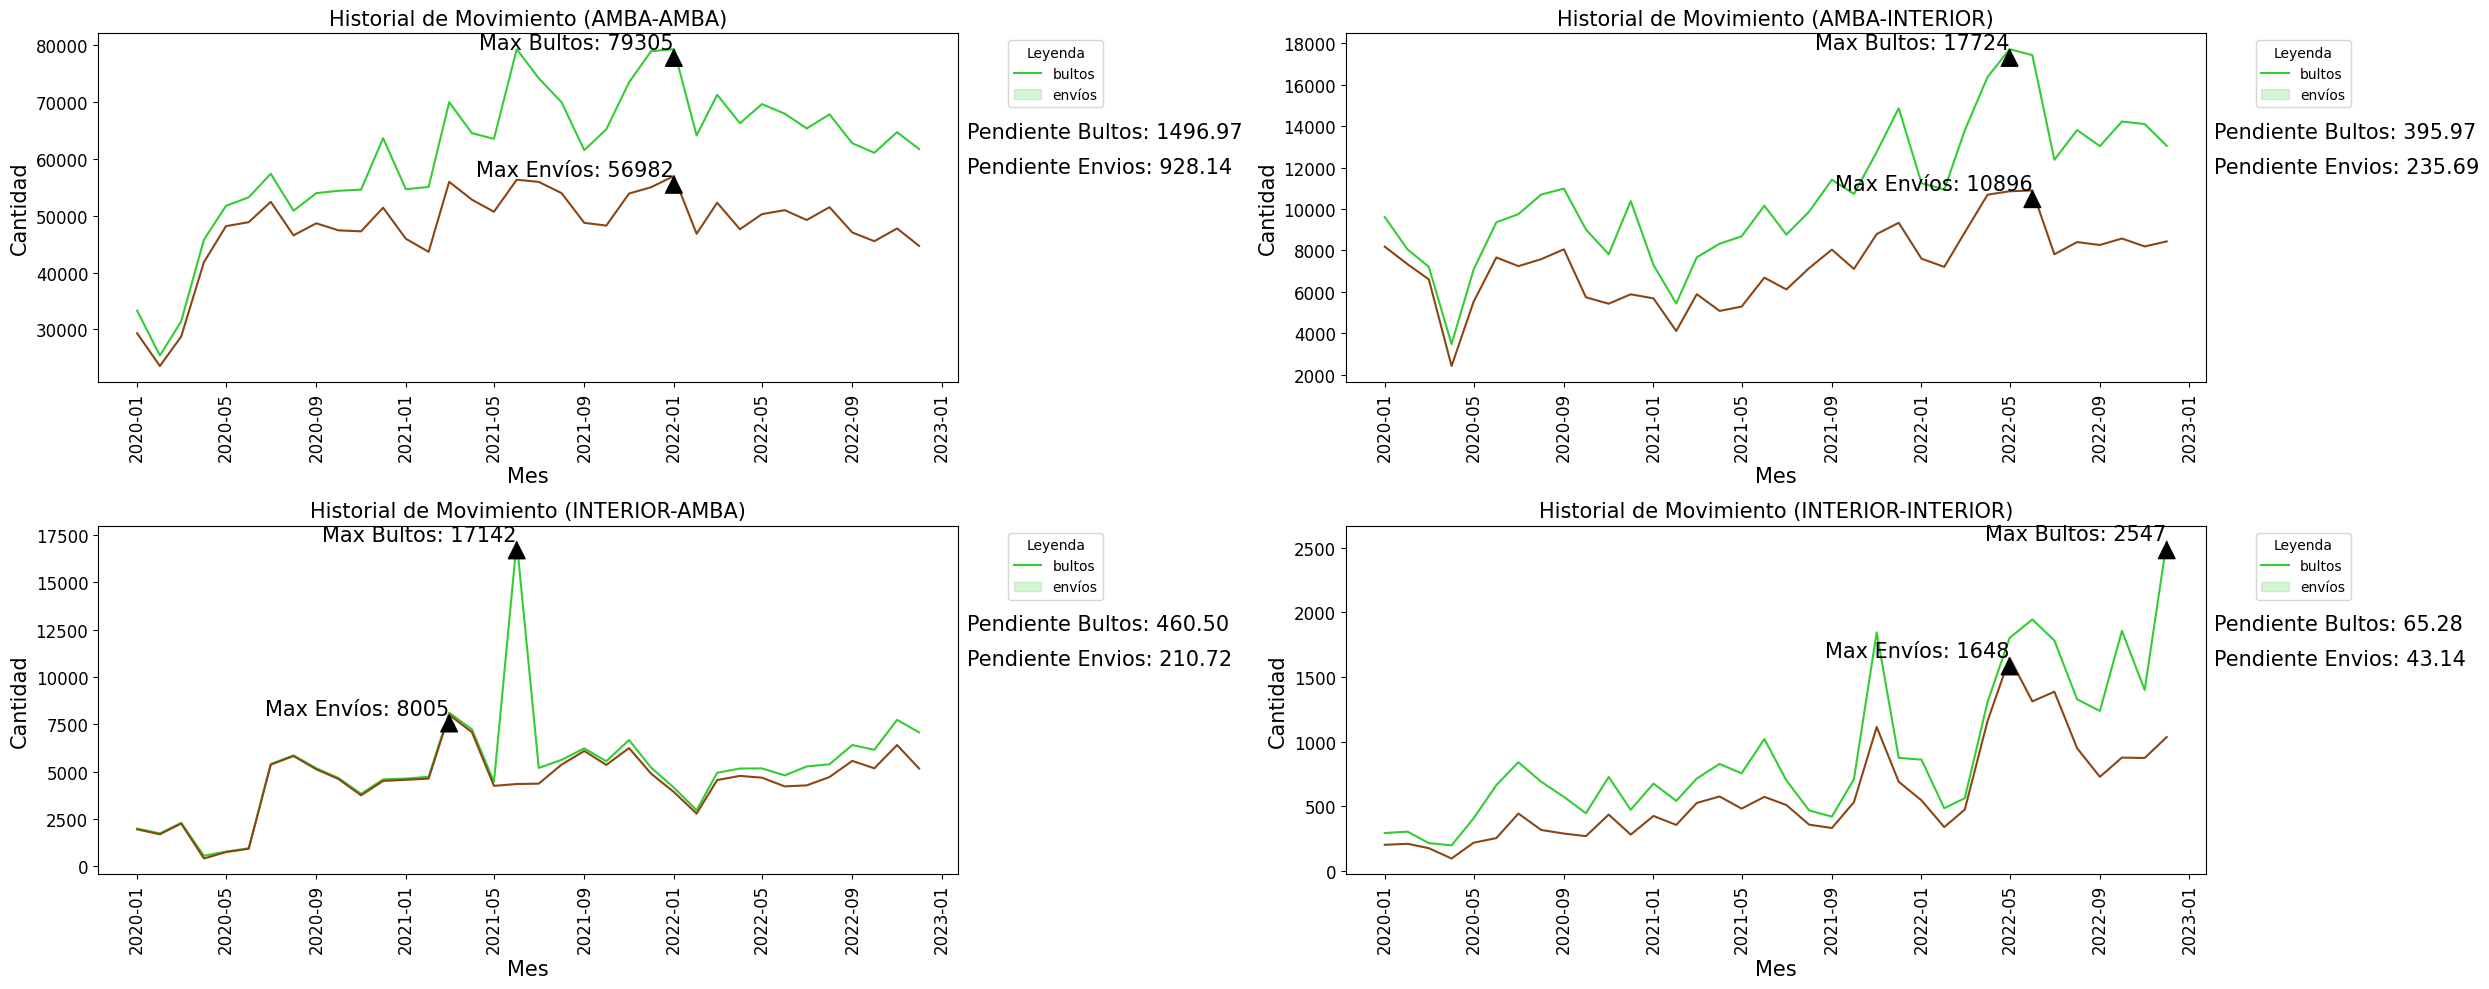

In [74]:
# Crear subgr√°ficos para cada movimiento
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25, 10))

# Definir una lista de colores para el eje hue
colors_bultos = ['#32CD32', '#32CD32', '#32CD32', '#32CD32']
colors_envios = ['#8B4513', '#8B4513', '#8B4513', '#8B4513']


# Graficar los subgr√°ficos
for i, zona in enumerate(mov):
    row = i // 2
    col = i % 2
    sns.lineplot(data=enviobulto1[enviobulto1['movimiento'] == zona], x="fecha", y="bultos", hue="movimiento", palette=[colors_bultos[i]], ax=axs[row, col], label="bultos")
    sns.lineplot(data=enviobulto1[enviobulto1['movimiento'] == zona], x="fecha", y="id", hue="movimiento", palette=[colors_envios[i]], ax=axs[row, col], label="env√≠os")
    
    # Encontrar el punto m√°ximo para bultos y env√≠os y a√±adir la anotaci√≥n
    max_bultos = enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].max()
    min_bultos = enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].min()
    max_envios = enviobulto1[enviobulto1['movimiento'] == zona]['id'].max()
    min_envios = enviobulto1[enviobulto1['movimiento'] == zona]['id'].min()
    pendiente1 = (max_bultos - min_bultos) / len(enviobulto1[enviobulto1['movimiento'] == zona])
    pendiente2 = (max_envios - min_envios) / len(enviobulto1[enviobulto1['movimiento'] == zona])
    
    
    axs[row, col].annotate(f'Max Bultos: {max_bultos}', 
                           xy=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].idxmax()], max_bultos), 
                           xytext=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['bultos'].idxmax()], max_bultos+10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=0.1))
    
    axs[row, col].annotate(f'Max Env√≠os: {max_envios}', 
                           xy=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['id'].idxmax()], max_envios), 
                           xytext=(enviobulto1[enviobulto1['movimiento'] == zona]['fecha'][enviobulto1[enviobulto1['movimiento'] == zona]['id'].idxmax()], max_envios+10), 
                           ha='right', fontsize=15, arrowprops=dict(facecolor='black', shrink=0.1))
    
    axs[row, col].set_title(f"Historial de Movimiento ({zona})",fontsize=15)
    axs[row, col].set_xlabel("Mes",fontsize=15)
    axs[row, col].set_ylabel("Cantidad",fontsize=15)
    axs[row, col].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1), labels=["bultos", "env√≠os"])
    axs[row, col].set_xticklabels(axs[row, col].get_xticklabels(), rotation=90, ha='center', fontsize=12)
    axs[row, col].set_yticklabels(axs[row, col].get_yticklabels(),  ha='right', fontsize=12)
    axs[row, col].text(1.01, 0.7, f"Pendiente Bultos: {pendiente1:.2f}", transform=axs[row, col].transAxes,fontsize=15)
    axs[row, col].text(1.01, 0.6, f"Pendiente Envios: {pendiente2:.2f}", transform=axs[row, col].transAxes,fontsize=15)

# Ajustar el espacio entre subgr√°ficos y mostrar la figura
plt.tight_layout()
plt.show()

‚≠ï En base a las pendientes proporcionadas, podemos concluir que la regi√≥n con mayor cantidad de env√≠os y bultos es **AMBA-AMBA**, lo que indica que hay una gran cantidad de movimientos dentro de esta regi√≥n. La regi√≥n **AMBA-INTERIOR** muestra una cantidad considerablemente menor de env√≠os y bultos, lo que sugiere que los movimientos interregionales no son tan frecuentes. La regi√≥n **INTERIOR-AMBA** tiene pendientes similares a **AMBA-INTERIOR**, lo que sugiere que el movimiento de bienes desde el interior hacia AMBA y viceversa es relativamente equilibrado. La regi√≥n **INTERIOR-INTERIOR** tiene las pendientes m√°s bajas, lo que indica que hay una cantidad menor de movimientos entre las regiones interiores.

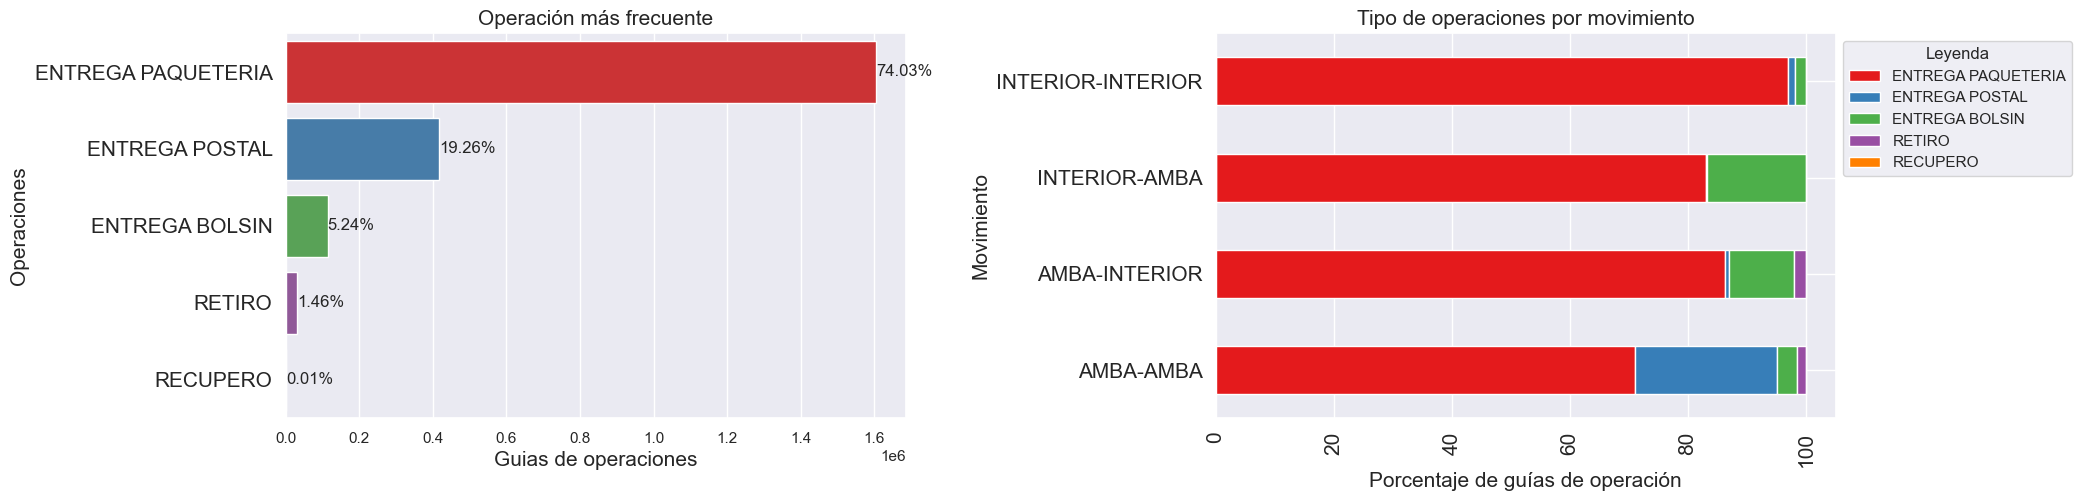

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5), gridspec_kw={'wspace': 0.5})

op = df_2["tipo_operacion"]
sns.set(font_scale=1)

tipos_operacion = ['ENTREGA PAQUETERIA', 'ENTREGA POSTAL', 'ENTREGA BOLSIN', 'RETIRO', 'RECUPERO']

# Agrego los valores porcentuales de la variable tipo_operacion
for n, i in enumerate(tipos_operacion):
    porc = df_2["tipo_operacion"].value_counts(normalize=True)[i] * 100
    axes[0].text(df_2['tipo_operacion'].value_counts(normalize=False).round(2)[i], n, f"{porc.round(2)}%", va="center", fontsize=12)

sns.countplot(y=op, ax=axes[0], palette='Set1', order=tipos_operacion)  # Agrega el par√°metro 'order' para especificar el orden
axes[0].set_title("Operaci√≥n m√°s frecuente", fontsize=15)
axes[0].set_xlabel("Guias de operaciones", fontsize=15)
axes[0].set_ylabel("Operaciones", fontsize=15)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, ha='right', fontsize=15)

mov_op = df_2.groupby(["movimiento", "tipo_operacion"]).agg({"id": 'count'})
mov = mov_op.unstack()

mov_op_pct = mov_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
mov_op_pct = mov_op_pct.round(2)

mov_op_pct = mov_op_pct.unstack(level=1)
mov_op_pct.columns = mov_op_pct.columns.droplevel()

mov_op_pct = mov_op_pct.reindex(columns=tipos_operacion)  # Reordena las columnas seg√∫n el orden deseado

ax1 = mov_op_pct.plot(kind='barh', stacked=True, ax=axes[1], fontsize=15, color=sns.color_palette('Set1'))
ax1.set_xlabel('Porcentaje de gu√≠as de operaci√≥n', fontsize=15)
ax1.set_ylabel('Movimiento', fontsize=15)
ax1.set_title('Tipo de operaciones por movimiento', fontsize=15)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontsize=15)
ax1.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1, 1))

plt.show()


‚≠ï La operaci√≥n m√°s frecuente en el servicio postal es la entrega de paqueteria. Esta informaci√≥n puede ser √∫til para planificar mejor la asignaci√≥n de recursos y mejorar la eficiencia operativa.

Se ha analizado la distribuci√≥n de los tipos de operaciones por movimiento, lo que puede ayudar a comprender c√≥mo se realizan las diferentes operaciones en el servicio postal y c√≥mo se relacionan con los diferentes movimientos de env√≠o y recepci√≥n.

El gr√°fico de barras apiladas en el segundo eje muestra la distribuci√≥n de los diferentes tipos de operaciones por movimiento en t√©rminos de porcentaje. Este gr√°fico permite comparar f√°cilmente la proporci√≥n de cada tipo de operaci√≥n en cada movimiento, lo que puede ayudar a identificar patrones y tendencias.

En conclucion podemos comprender que el fuerte son el envio de paqueteria desde el AMBA al Interior del pais, no asi es el caso inverso.

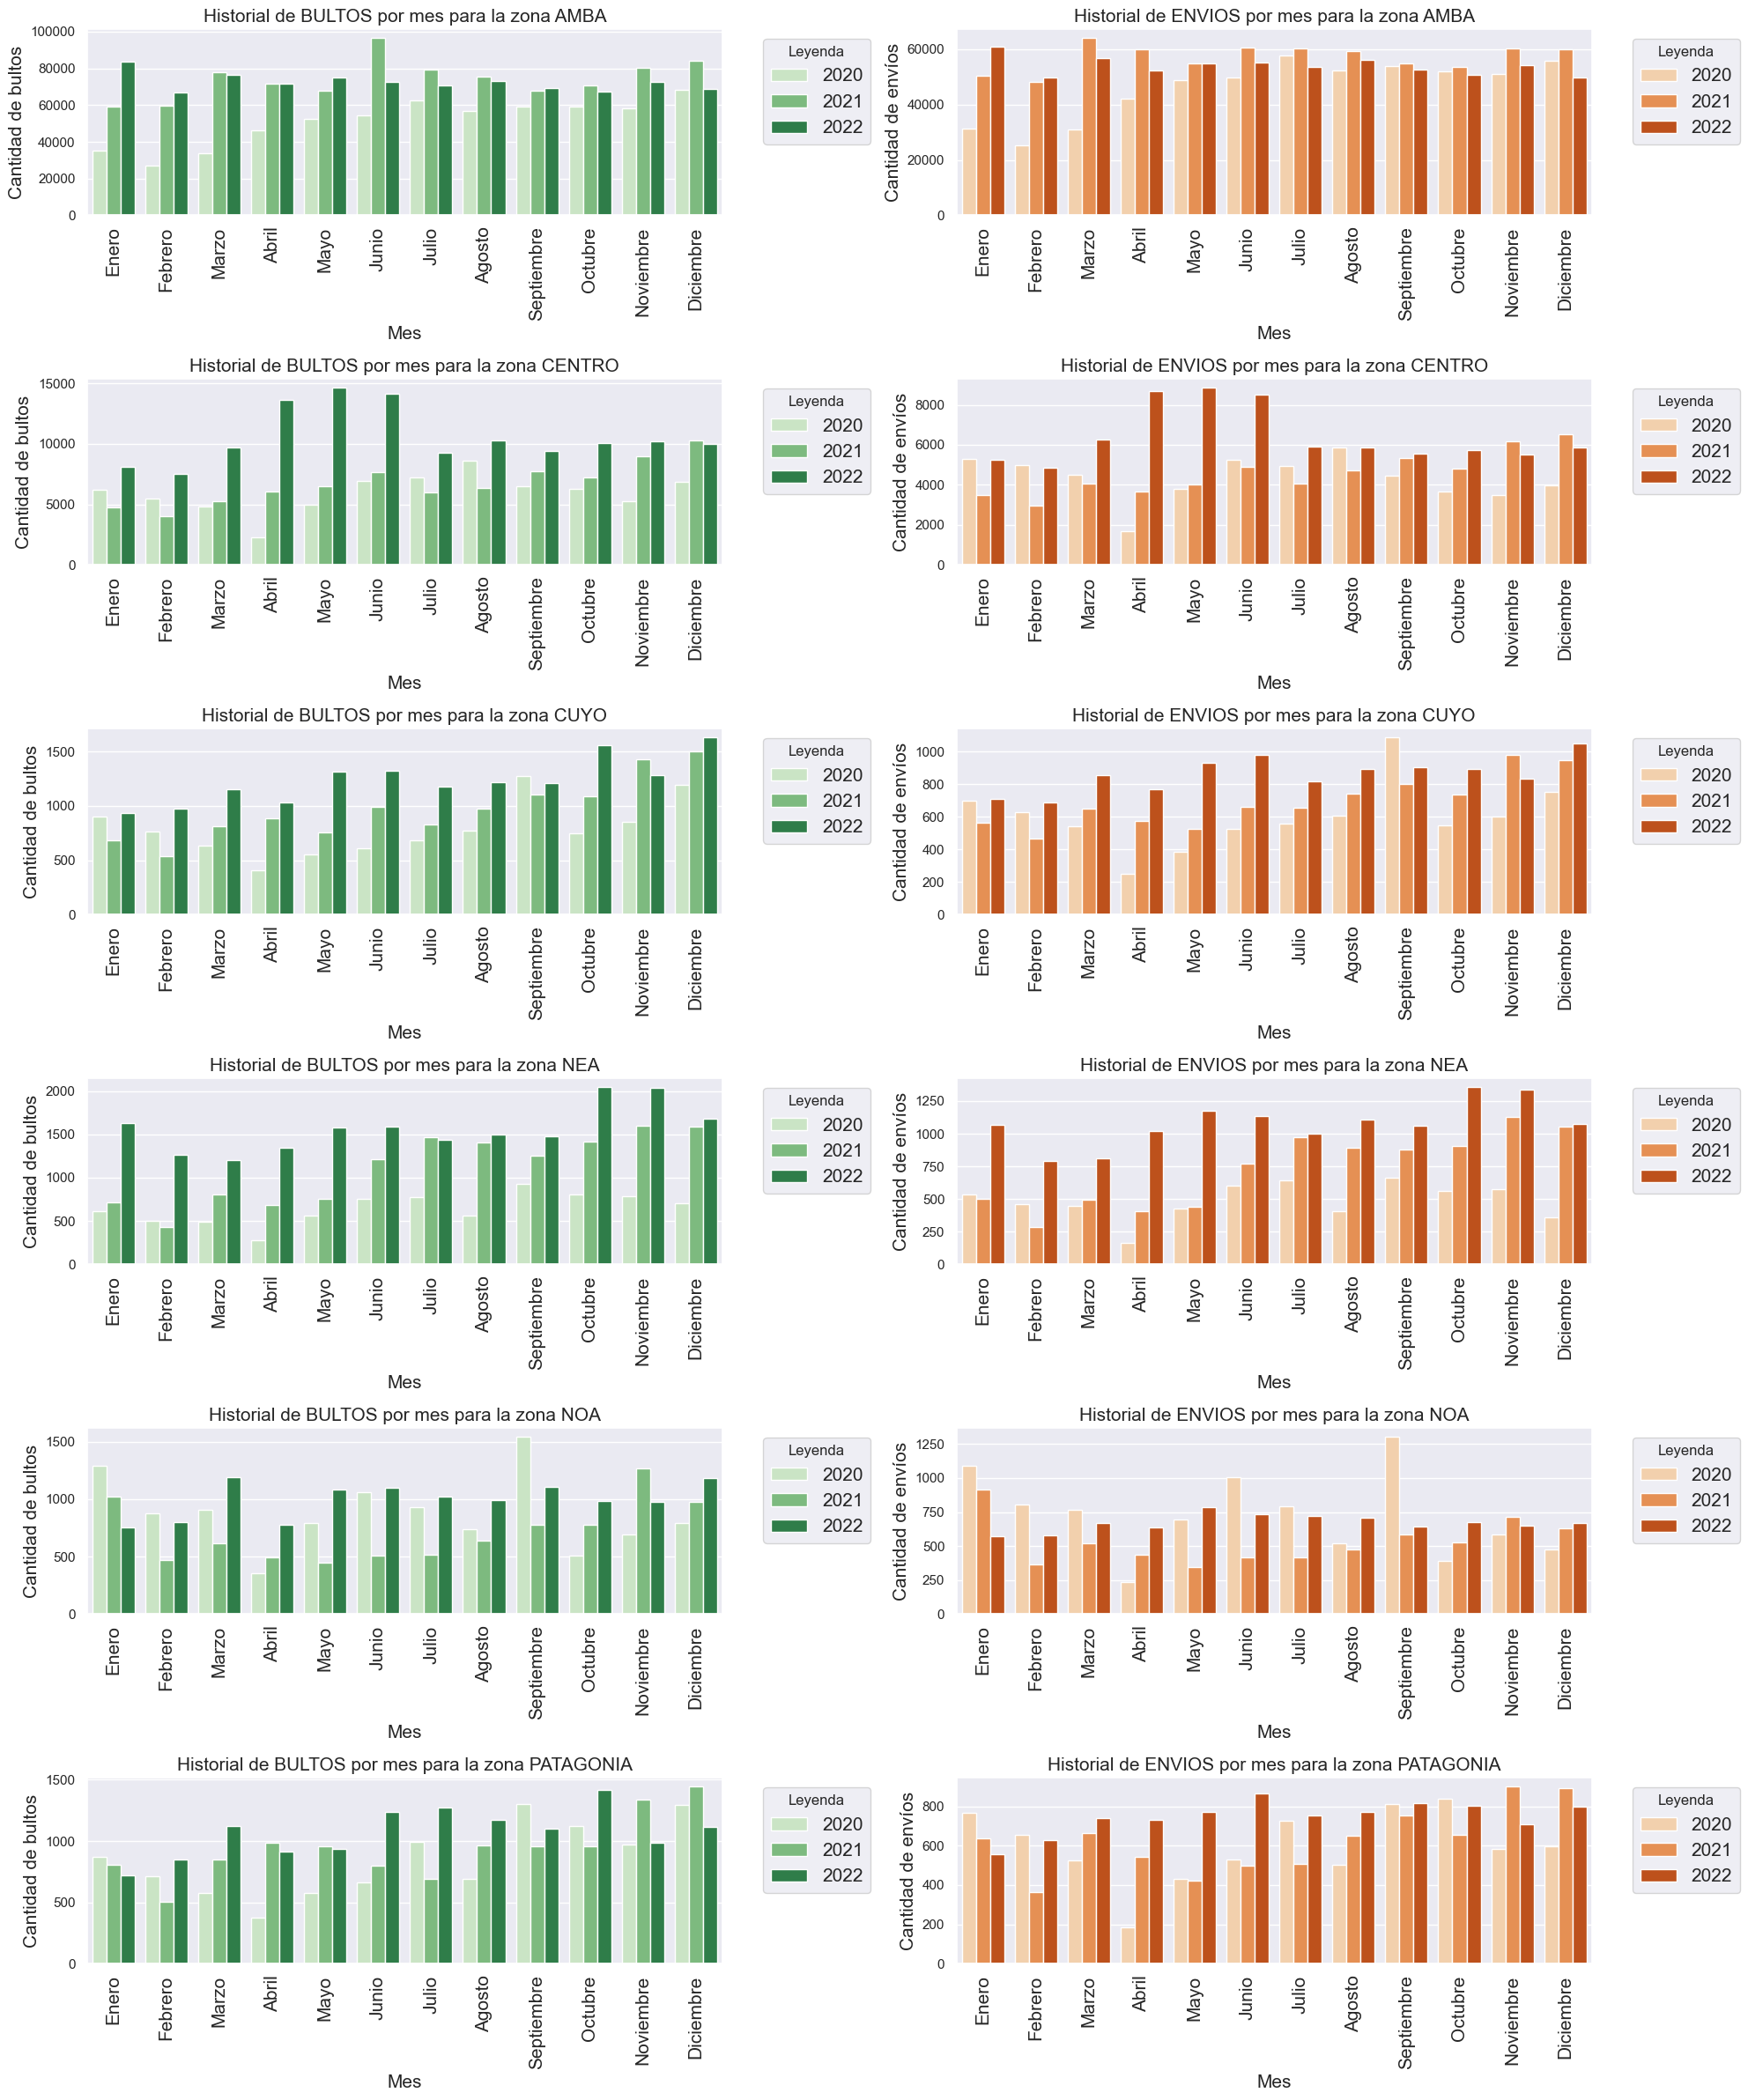

Los meses m√°s destacados para la zona AMBA son:
- Bultos: Junio
- Env√≠os: Marzo

Los meses m√°s destacados para la zona CENTRO son:
- Bultos: Mayo
- Env√≠os: Mayo

Los meses m√°s destacados para la zona CUYO son:
- Bultos: Diciembre
- Env√≠os: Septiembre

Los meses m√°s destacados para la zona NEA son:
- Bultos: Octubre
- Env√≠os: Octubre

Los meses m√°s destacados para la zona NOA son:
- Bultos: Septiembre
- Env√≠os: Septiembre

Los meses m√°s destacados para la zona PATAGONIA son:
- Bultos: Diciembre
- Env√≠os: Noviembre



In [78]:
# Agrupar por zona_destino, a√±o y mes
enviobulto2 = df_2.groupby(['zona_destino', 'anio_1', 'mes_1']).agg({'bultos':'sum', 'id':'count'}).reset_index()
enviobulto3 = df_2.groupby(['mes_1']).agg({'bultos':'sum', 'id':'count'}).reset_index()


# Crear una columna con el nombre del mes
dict_meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}
enviobulto2['nombre_mes'] = enviobulto2['mes_1'].apply(lambda x: dict_meses[x])

# Ordenar por a√±o y mes
enviobulto2 = enviobulto2.sort_values(['anio_1', 'mes_1'])

# Obtener las zonas √∫nicas
zonas = enviobulto2['zona_destino'].unique()

# Crear una figura con subplots para cada zona
fig, axs = plt.subplots(nrows=len(zonas), ncols=2, figsize=(20, 4*len(zonas)))

# Recorrer cada zona y crear los gr√°ficos correspondientes en cada subplot
for i, zona in enumerate(zonas):
    data = enviobulto2[enviobulto2['zona_destino'] == zona]
    
    # Crear un gr√°fico de barras para bultos
    sns.barplot(x='nombre_mes', y='bultos', hue='anio_1', data=data, ax=axs[i][0], palette='Greens')
    axs[i][0].set_title(f"Historial de BULTOS por mes para la zona {zona}",fontsize=15)
    axs[i][0].set_xlabel('Mes',fontsize=15)
    axs[i][0].set_ylabel('Cantidad de bultos',fontsize=15)
    axs[i][0].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1),fontsize=15)
    axs[i][0].set_xticklabels(axs[i][0].get_xticklabels(), rotation=90, ha='center', fontsize=15)

    # Crear un gr√°fico de barras para env√≠os
    sns.barplot(x='nombre_mes', y='id', hue='anio_1', data=data, ax=axs[i][1],palette='Oranges')
    axs[i][1].set_title(f"Historial de ENVIOS por mes para la zona {zona}",fontsize=15)
    axs[i][1].set_xlabel('Mes',fontsize=15)
    axs[i][1].set_ylabel('Cantidad de env√≠os',fontsize=15)
    axs[i][1].legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1),fontsize=15)
    axs[i][1].set_xticklabels(axs[i][0].get_xticklabels(), rotation=90, ha='center', fontsize=15)

# Ajustar los subplots y mostrar la figura
fig.tight_layout()
plt.show()

# Obtener los meses m√°s destacados por zona de destino
for zona in zonas:
    data = enviobulto2[enviobulto2['zona_destino'] == zona]
    bultos_max = data.loc[data['bultos'].idxmax(), 'nombre_mes']
    envios_max = data.loc[data['id'].idxmax(), 'nombre_mes']
    print(f"Los meses m√°s destacados para la zona {zona} son:\n- Bultos: {bultos_max}\n- Env√≠os: {envios_max}\n")



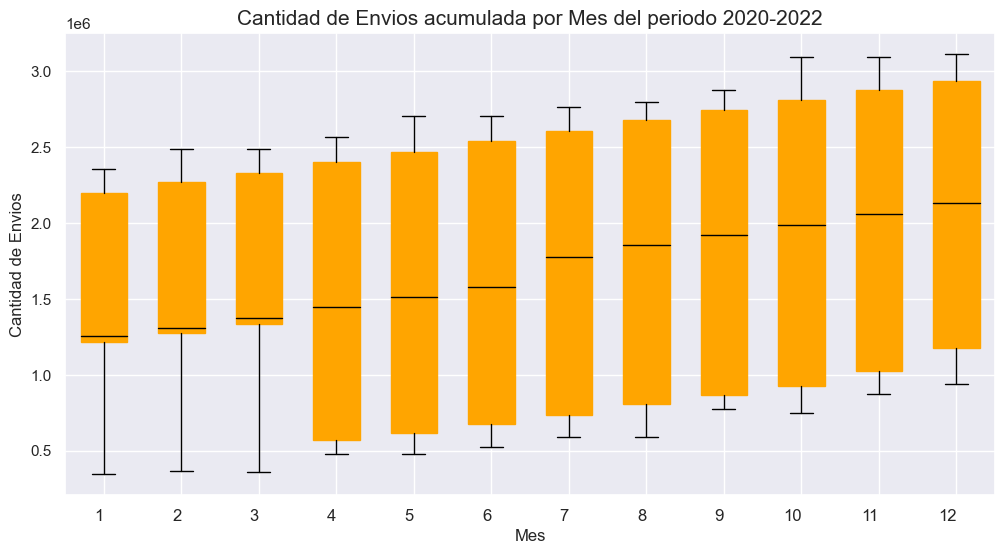

In [79]:
# Crear una lista ordenada de los meses √∫nicos
meses_ordenados = sorted(df_2['mes_1'].unique())

fig, ax = plt.subplots(figsize=(12, 6))

boxplot_data = []

# Iterar sobre cada mes
for i, mes in enumerate(meses_ordenados):
    # Filtrar los datos solo para el mes actual
    data = df_2[df_2['mes_1'] == mes]
    
    # Agregar los valores de los bultos a la lista
    boxplot_data.append(data['id'].tolist())

# Crear el boxplot para los bultos
ax.boxplot(boxplot_data, positions=range(len(meses_ordenados)), widths=0.6, patch_artist=True,
           boxprops=dict(facecolor='orange', color='orange'),
           medianprops=dict(color='black'))

ax.set_title("Cantidad de Envios acumulada por Mes del periodo 2020-2022", fontsize=15)
ax.set_xlabel('Mes', fontsize=12)
ax.set_ylabel('Cantidad de Envios', fontsize=12)

# Etiquetas de los ticks del eje x
ax.set_xticks(range(len(meses_ordenados)))
ax.set_xticklabels(meses_ordenados, ha='right', fontsize=12)

plt.show()



In [80]:
from matplotlib.cbook import boxplot_stats

# Obtener las estad√≠sticas del boxplot
stats = boxplot_stats(boxplot_data)

# Imprimir los resultados en texto
for i, stat in enumerate(stats):
    print(f"Mes: {meses_ordenados[i]}")
    print("Estad√≠sticas:")
    print(f" - Mediana: {stat['med']}")
    print(f" - Q1: {stat['q1']}")
    print(f" - Q3: {stat['q3']}")
    print(f" - Valores at√≠picos: {stat['fliers']}")
    print("")

plt.show()

Mes: 1
Estad√≠sticas:
 - Mediana: 1259226.0
 - Q1: 1217240.5
 - Q3: 2200952.5
 - Valores at√≠picos: []

Mes: 2
Estad√≠sticas:
 - Mediana: 1312271.0
 - Q1: 1276192.5
 - Q3: 2269610.5
 - Valores at√≠picos: []

Mes: 3
Estad√≠sticas:
 - Mediana: 1376769.5
 - Q1: 1332515.25
 - Q3: 2331759.75
 - Valores at√≠picos: []

Mes: 4
Estad√≠sticas:
 - Mediana: 1450651.5
 - Q1: 571203.25
 - Q3: 2400557.75
 - Valores at√≠picos: []

Mes: 5
Estad√≠sticas:
 - Mediana: 1515499.0
 - Q1: 618731.0
 - Q3: 2469896.0
 - Valores at√≠picos: []

Mes: 6
Estad√≠sticas:
 - Mediana: 1579955.0
 - Q1: 676739.5
 - Q3: 2539063.5
 - Valores at√≠picos: []

Mes: 7
Estad√≠sticas:
 - Mediana: 1779133.5
 - Q1: 737897.75
 - Q3: 2606154.25
 - Valores at√≠picos: []

Mes: 8
Estad√≠sticas:
 - Mediana: 1853612.0
 - Q1: 807506.0
 - Q3: 2677678.0
 - Valores at√≠picos: []

Mes: 9
Estad√≠sticas:
 - Mediana: 1920390.5
 - Q1: 867044.75
 - Q3: 2747326.25
 - Valores at√≠picos: []

Mes: 10
Estad√≠sticas:
 - Mediana: 1989060.0
 - Q1: 928078.5
 

Bas√°ndonos en las estad√≠sticas proporcionadas, podemos hacer las siguientes conclusiones sobre los meses m√°s fuertes y m√°s d√©biles en t√©rminos de cantidad de envios de los a√±os 2020-2021-2022:

‚ô¶ Meses m√°s fuertes:

Mes 12: Con una mediana de 2,126,423 envios, es el mes con la mayor cantidad de envios en promedio durante el periodo de 3 a√±os.
Mes 11: Con una mediana de 2,056,143 envios, tambi√©n presenta una alta cantidad de envios.


‚ô¶ Meses m√°s d√©biles:

Mes 4: Aunque presenta una mediana relativamente alta de 1,442,818 envios, su primer cuartil es significativamente bajo (568,056 envios). Esto indica que en el mes 4 hay una mayor dispersi√≥n de los datos y una posible presencia de valores at√≠picos.
Mes 5: Al igual que el mes 4, tiene una mediana alta (1,509,499 envios), pero su primer cuartil tambi√©n es bajo (615,021 envios), lo que sugiere una mayor variabilidad en los datos.

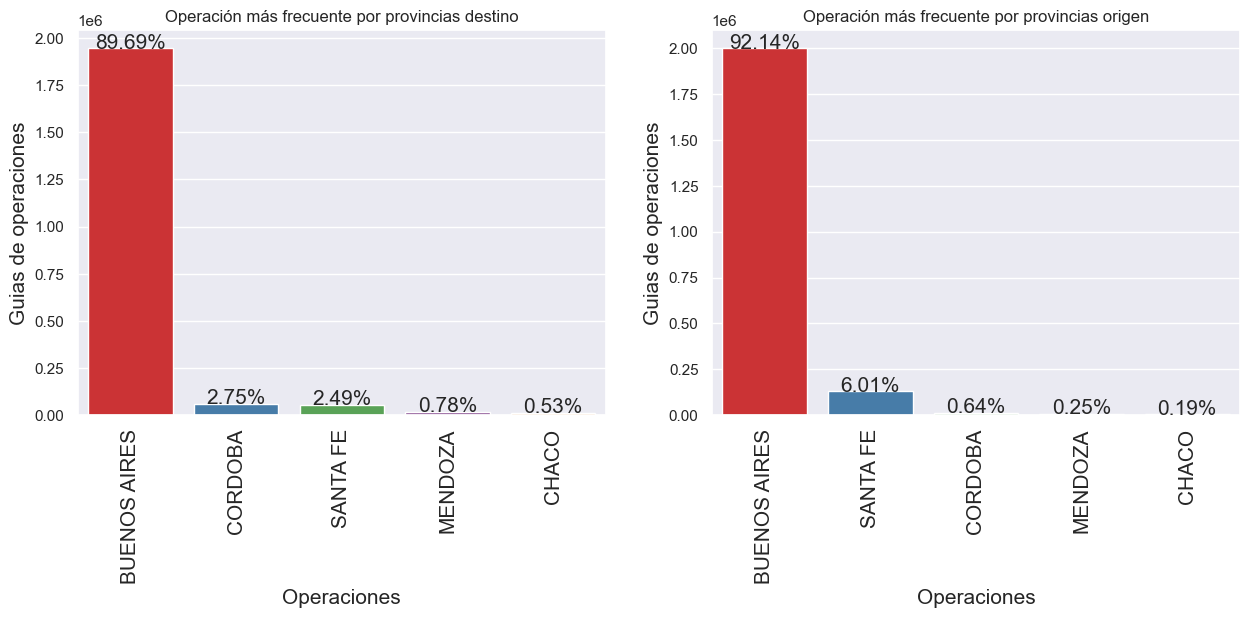

In [81]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5), gridspec_kw={'hspace': .5})

prov_op_d = df_2["provincia_destino"]
prov_op_o = df_2["provincia_origen"]
sns.set(font_scale=1)

sns.countplot(x=prov_op_d, ax=axes[0], palette='Set1', order=prov_op_d.value_counts().head(5).index)
axes[0].set_title("Operaci√≥n m√°s frecuente por provincias destino", fontsize=12)
axes[0].set_xlabel("Operaciones", fontsize=15)
axes[0].set_ylabel("Guias de operaciones", fontsize=15)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='center', fontsize=15)

sns.countplot(x=prov_op_o, ax=axes[1], palette='Set1',order=prov_op_o.value_counts().head(5).index)
axes[1].set_title("Operaci√≥n m√°s frecuente por provincias origen", fontsize=12)
axes[1].set_xlabel("Operaciones", fontsize=15)
axes[1].set_ylabel("Guias de operaciones", fontsize=15)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='center', fontsize=15)

# Funci√≥n para agregar etiquetas con porcentajes
def AutoLabelCountPlot(ax, df):
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{0:.2f}%'.format(100 * height / total),
                ha="center", fontsize=15)

AutoLabelCountPlot(axes[0], prov_op_d)
AutoLabelCountPlot(axes[1], prov_op_o)

prov_d_op= df_2.groupby(["provincia_destino","provincia_origen"]).agg({"id":'count'})
prov_d  =  prov_d_op.unstack()

prov_d_op_pct = prov_d_op.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
prov_d_op_pct = prov_d_op_pct.round(2)
prov_d_op_pct = prov_d_op_pct.unstack(level=1)
prov_d_op_pct.columns = prov_d_op_pct.columns.droplevel()

plt.show()

‚≠ïLa mayor√≠a de las operaciones tienen como destino (89.83%) y origen (92.34%) la provincia de Buenos Aires. Las operaciones con destino a Cordoba son del 2.72% mientras que esta provincia genera envios por solo el 0.63%. Santa Fe es el destino del 2.44% de las operaciones y nacen de dicha provincia el 5.84%. Por lo tanto las 2 provincias con mayor caudal y generacion de actividad son Buenos Aires y Santa Fe.

In [85]:
df_2.to_csv('archivo_final.csv', index=False, sep='|')

### ‚è© **7. <u>Correlaciones entre las variables</u>** 

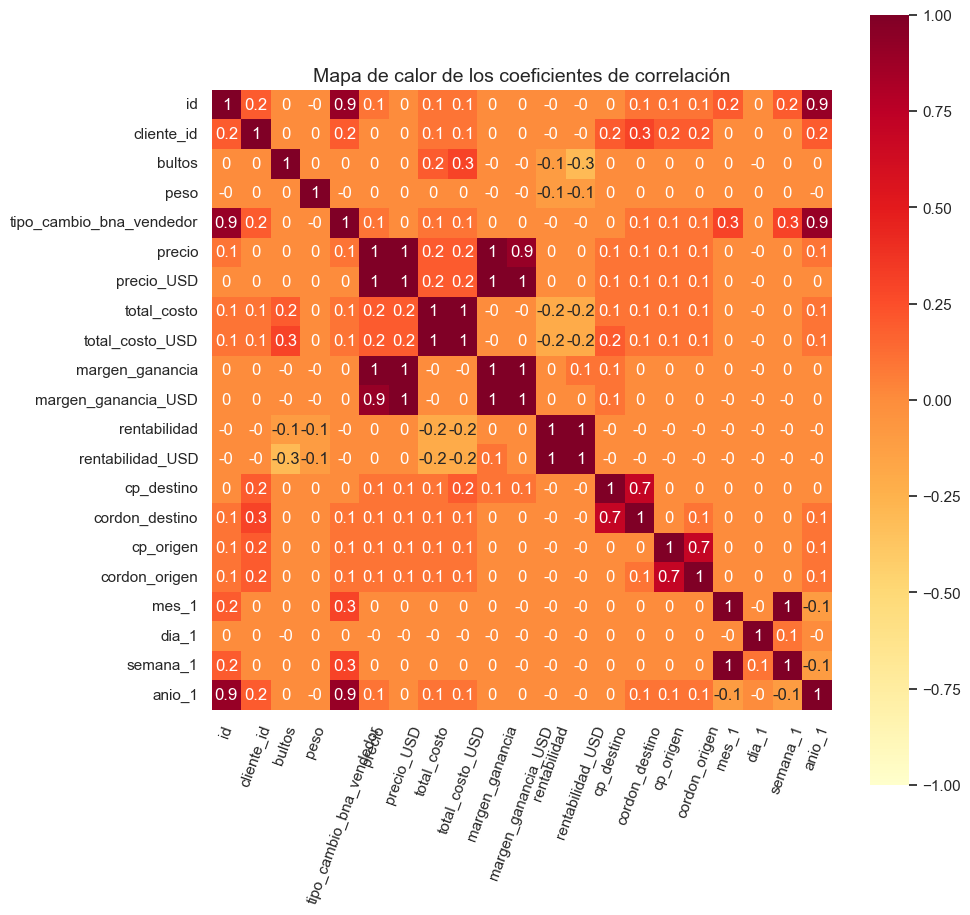

In [82]:
plt.figure(figsize = (10,10))
plt.axis('scaled')
sns.heatmap(df_2.corr(numeric_only = True).round(1), vmin=-1, vmax=1, cmap = "YlOrRd", cbar = True, annot = True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlaci√≥n', fontsize = 14)
plt.show()

Las variables categ√≥ricas que podr√≠an utilizarse para *predecir el precio* de los env√≠os incluyen **tipo de operaci√≥n, grupo, estado, localidad de destino, provincia de destino, zona de destino, subzona de destino, localidad de origen, provincia de origen, zona de origen, subzona de origen, movimiento y mes**. Para predecir el precio de los env√≠os, un *modelo de regresi√≥n* podr√≠a ser √∫til, en particular un modelo de *regresi√≥n lineal m√∫ltiple* que permita modelar la relaci√≥n entre m√∫ltiples variables predictoras y la variable objetivo. Esto podr√≠a ser √∫til para una mejor planificaci√≥n de la log√≠stica, identificaci√≥n de oportunidades de ahorro de costos y la capacidad de proporcionar cotizaciones m√°s precisas a los clientes.

### ‚è© **8. <u>Insights y recomendaciones</u>** 

En t√©rminos de env√≠o y manejo de bultos, la regi√≥n de **AMBA** se destaca claramente sobre las otras regiones, lo que sugiere que esta regi√≥n es la m√°s importante en el negocio de log√≠stica. Adem√°s, al analizar la distribuci√≥n de los tipos de operaciones por movimiento, se han identificado los meses m√°s relevantes para cada zona en t√©rminos de env√≠os y bultos, lo que podr√≠a ser √∫til para una planificaci√≥n eficiente de los recursos.

Al examinar la distribuci√≥n de *precios*, *costos* y *m√°rgenes de ganancia*, se ha identificado un estancamiento o desactualizaci√≥n en las listas de precios, lo que podr√≠a indicar una necesidad de revisar las estrategias de precios. Tambi√©n se ha identificado que hay algunas empresas consideradas buenas como por ejemplo (AgroEco SA', ' AgroSur', ' Agroindustrias', ' Anima Solution') y que dejan un buen margen de ganancia, mientras que otras no suman ni aportan mucho al crecimiento como (GenoTech SA', ' Geomar', ' GigaNet SA', ' GlobeWorks SRL'), por lo que se podr√≠an explorar oportunidades de colaboraci√≥n o reevaluar la relaci√≥n comercial con estas empresas.

Las variables categ√≥ricas que podr√≠an utilizarse para *predecir el precio* de los env√≠os incluyen **tipo de operaci√≥n, grupo, estado, localidad de destino, provincia de destino, zona de destino, subzona de destino, localidad de origen, provincia de origen, zona de origen, subzona de origen, movimiento y mes**. Para predecir el precio de los env√≠os, un *modelo de regresi√≥n* podr√≠a ser √∫til, en particular un modelo de *regresi√≥n lineal m√∫ltiple* que permita modelar la relaci√≥n entre m√∫ltiples variables predictoras y la variable objetivo. Esto podr√≠a ser √∫til para una mejor planificaci√≥n de la log√≠stica, identificaci√≥n de oportunidades de ahorro de costos y la capacidad de proporcionar cotizaciones m√°s precisas a los clientes.

En base a los resultados, se recomienda aprovechar la fortaleza de la regi√≥n de **AMBA** para mejorar la eficiencia operativa, mientras se presta atenci√≥n a otras regiones como **CENTRO**, **CUYO**, **NEA**, **NOA** y **PATAGONIA** para estimular su crecimiento. Asimismo, una planificaci√≥n adecuada de la asignaci√≥n de recursos en funci√≥n a los siguiente:
                                                                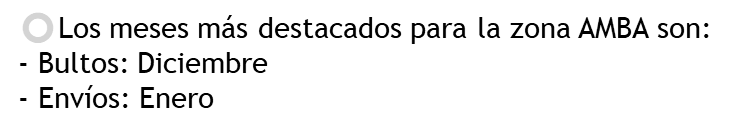
                                                                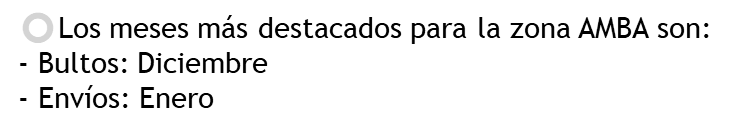
                                                                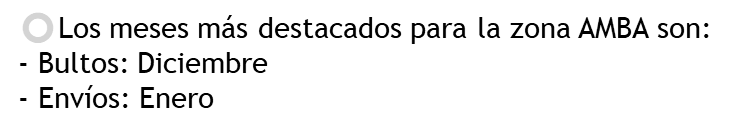
                                                                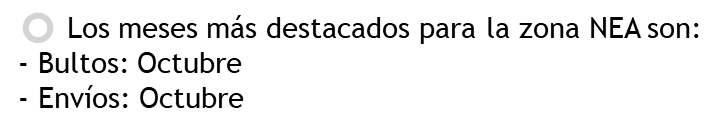
                                                                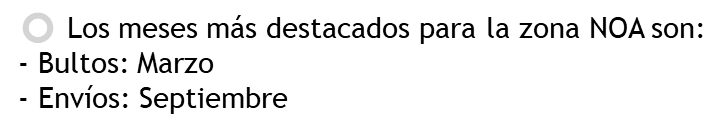
                                                                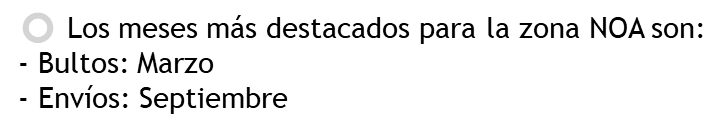
                                                                

de esta forma se estaria preparado para los picos de actividad y mejorar la eficiencia operativa. Se recomienda adem√°s analizar mensualmente los precios de venta y costos pra aquellas empresas calificadas como malas.

### ‚è© **9. <u>ALGORITMO ML MPV </u>** 

Nos aseguramos de tener un conjunto de datos que incluya la variable precio_USD y la varaible fecha_hora correspondiente a cada cliente. Se agruparan los datos por cliente y fecha para tener un regitro de precio de venta por fecha de cada cliente

In [83]:
from sklearn.metrics import mean_squared_error
import datetime as dt

Dropdown(description='Opci√≥n:', index=1, options=('Cliente Espec√≠fico', 'Global'), value='Global')

Dropdown(description='Cliente:', options=(' Abacus IT SRL', ' AeroCargo SA', ' AgroEco SA', ' AgroSur', ' Agro‚Ä¶

Button(description='Predecir', style=ButtonStyle())

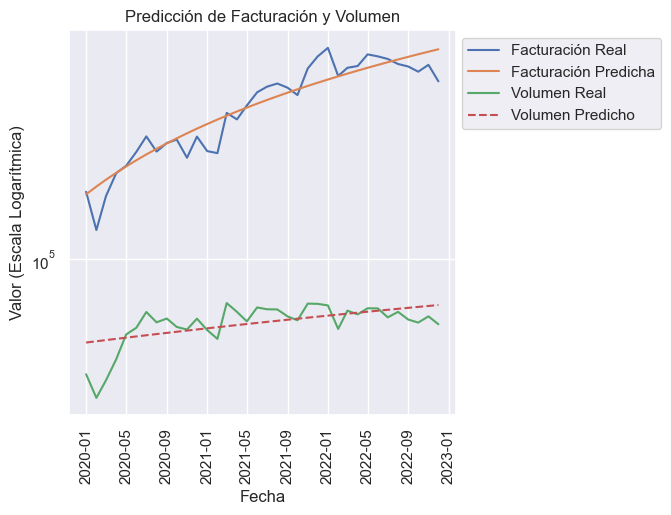

In [84]:
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from IPython.display import display, clear_output

# Paso 1: Preparaci√≥n de los datos
cliente_data = df_2.groupby(['cliente_nombre', 'fecha']).agg({'precio_USD': 'sum', 'id': 'count'}).reset_index()

# Opci√≥n 1: Seleccionar un cliente espec√≠fico
cliente_nombres = cliente_data['cliente_nombre'].unique()

# Paso 3: Definir funci√≥n de predicci√≥n y gr√°fica
def predecir_facturacion(opcion, cliente_nombre):
    if opcion == 'Cliente Espec√≠fico':
        data = cliente_data[cliente_data['cliente_nombre'] == cliente_nombre][['fecha', 'precio_USD', 'id']]
        data.set_index('fecha', inplace=True)
    else:
        data = cliente_data.groupby('fecha').agg({'precio_USD': 'sum', 'id': 'sum'}).reset_index()
        data.set_index('fecha', inplace=True)
    
    # Paso 4: Definir variables independientes y dependiente
    X = data.dropna().index.to_julian_date().values.reshape(-1, 1)
    y_facturacion = data['precio_USD'].dropna().values
    y_volumen = data['id'].dropna().values
    
    # Paso 5: Entrenamiento del modelo de regresi√≥n lineal para facturaci√≥n
    modelo_facturacion = LinearRegression()
    modelo_facturacion.fit(X, y_facturacion)
    
    # Paso 6: Predicci√≥n de facturaci√≥n
    prediccion_facturacion = modelo_facturacion.predict(X)
    
    # Paso 7: Entrenamiento del modelo de regresi√≥n lineal para volumen
    modelo_volumen = LinearRegression()
    modelo_volumen.fit(X, y_volumen)
    
    # Paso 8: Predicci√≥n de volumen
    prediccion_volumen = modelo_volumen.predict(X)
    
    # Paso 9: Visualizar la predicci√≥n
    prediccion_df = pd.DataFrame({'Facturacion_Predicha': prediccion_facturacion, 'Volumen_Predicho': prediccion_volumen}, index=data.dropna().index)
    
    # Paso 10: Graficar la predicci√≥n y los datos reales en escala logar√≠tmica
    plt.figure(figsize=(5, 5))
    plt.yscale('log')  # Aplicar escala logar√≠tmica al eje y
    plt.plot(data.index, data['precio_USD'], label='Facturaci√≥n Real')
    plt.plot(prediccion_df.index, prediccion_df['Facturacion_Predicha'], label='Facturaci√≥n Predicha')
    plt.plot(data.index, data['id'], label='Volumen Real')
    plt.plot(prediccion_df.index, prediccion_df['Volumen_Predicho'],linestyle='dashed', label='Volumen Predicho')
    plt.xlabel('Fecha')
    plt.ylabel('Valor (Escala Logar√≠tmica)')
    plt.title('Predicci√≥n de Facturaci√≥n y Volumen')
    plt.legend(loc="upper right", bbox_to_anchor=(1.55, 1))
    plt.xticks(rotation = 90)
    plt.show()

# Paso 2: Crear el widget interactivo
opcion_widget = widgets.Dropdown(
    options=['Cliente Espec√≠fico', 'Global'],
    value='Global',
    description='Opci√≥n:'
)

cliente_nombre_widget = widgets.Dropdown(
    options=cliente_nombres,
    value=cliente_nombres[0],
    description='Cliente:',
    disabled=False,
)

button = widgets.Button(description='Predecir')

def on_button_clicked(b):
    clear_output()
    display(opcion_widget, cliente_nombre_widget, button)
    predecir_facturacion(opcion_widget.value, cliente_nombre_widget.value)

button.on_click(on_button_clicked)

# Mostrar los widgets y ejecutar la predicci√≥n inicial
display(opcion_widget, cliente_nombre_widget, button)
predecir_facturacion(opcion_widget.value, cliente_nombre_widget.value)
